# ZNEUS Project 1: MLP - Alisa Podolska, Yulian Kysil

Dataset: https://www.kaggle.com/datasets/meirnizri/covid19-dataset?resource=download (57 MB)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats  
import warnings
import matplotlib
import statsmodels.api as sm
import statsmodels.stats.api as sms
from sklearn import preprocessing
from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

## Data analysis + predprocessing

Reading data

In [2]:
data = pd.read_csv("dataset.csv", sep=',')
data.head()

USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  PNEUMONIA  \
0      2             1    1             1  03/05/2020       97          1   
1      2             1    2             1  03/06/2020       97          1   
2      2             1    2             2  09/06/2020        1          2   
3      2             1    1             1  12/06/2020       97          2   
4      2             1    2             1  21/06/2020       97          2   

   AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  HIPERTENSION  OTHER_DISEASE  \
0   65         2         2  ...       2        2             1              2   
1   72        97         2  ...       2        2             1              2   
2   55        97         1  ...       2        2             2              2   
3   53         2         2  ...       2        2             2              2   
4   68        97         1  ...       2        2             1              2   

   CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  TOBACCO  CLASIFFICATION_FINAL  ICU  
0               2        2              2        2                     3   97  
1               2        1              1        2                     5   97  
2               2        2              2        2                     3    2  
3               2        2              2        2                     7   97  
4               2        2              2        2                     3   97  

[5 rows x 21 columns]

In [3]:
data.rename(columns={'CLASIFFICATION_FINAL': 'CLASSIFICATION_FINAL'}, inplace=True)

Deleting duplicities

In [4]:
duplicates = data[data.duplicated()]
print("Duplicate Rows:")
print(duplicates)

Duplicate Rows:
         USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  \
19           2             1    1             1  9999-99-99       97   
35           2             1    2             1  9999-99-99       97   
62           2             1    1             2  9999-99-99        2   
63           2             1    2             1  9999-99-99       97   
75           2             1    1             1  9999-99-99       97   
...        ...           ...  ...           ...         ...      ...   
1048556      2            13    2             1  9999-99-99       97   
1048558      1            13    2             1  9999-99-99       97   
1048566      2            13    2             1  9999-99-99       97   
1048570      2            13    2             1  9999-99-99       97   
1048573      2            13    2             1  9999-99-99       97   

         PNEUMONIA  AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  \
19               2   64         2         2  ...  

In [5]:
duplicates.head()

USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  PNEUMONIA  \
19      2             1    1             1  9999-99-99       97          2   
35      2             1    2             1  9999-99-99       97          2   
62      2             1    1             2  9999-99-99        2          2   
63      2             1    2             1  9999-99-99       97          2   
75      2             1    1             1  9999-99-99       97          2   

    AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  HIPERTENSION  \
19   64         2         2  ...       2        2             2   
35   45        97         2  ...       2        2             2   
62   25         2         2  ...       2        2             2   
63   33        97         2  ...       2        2             2   
75   24         2         2  ...       2        2             2   

    OTHER_DISEASE  CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  TOBACCO  \
19              2               2        2              2        2   
35              2               2        2              2        2   
62              2               2        2              2        2   
63              2               2        2              2        2   
75              2               2        2              2        2   

    CLASSIFICATION_FINAL  ICU  
19                     3   97  
35                     3   97  
62                     7    2  
63                     7   97  
75                     7   97  

[5 rows x 21 columns]

In [6]:
data = data.drop_duplicates()

In [7]:
print(data)

         USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  \
0            2             1    1             1  03/05/2020       97   
1            2             1    2             1  03/06/2020       97   
2            2             1    2             2  09/06/2020        1   
3            2             1    1             1  12/06/2020       97   
4            2             1    2             1  21/06/2020       97   
...        ...           ...  ...           ...         ...      ...   
1048568      1            13    2             1  9999-99-99       97   
1048569      1            13    1             2  9999-99-99        2   
1048571      1            13    2             2  9999-99-99        2   
1048572      2            13    2             1  9999-99-99       97   
1048574      2            13    2             1  9999-99-99       97   

         PNEUMONIA  AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  \
0                1   65         2         2  ...       2        2 

Detecting missing values

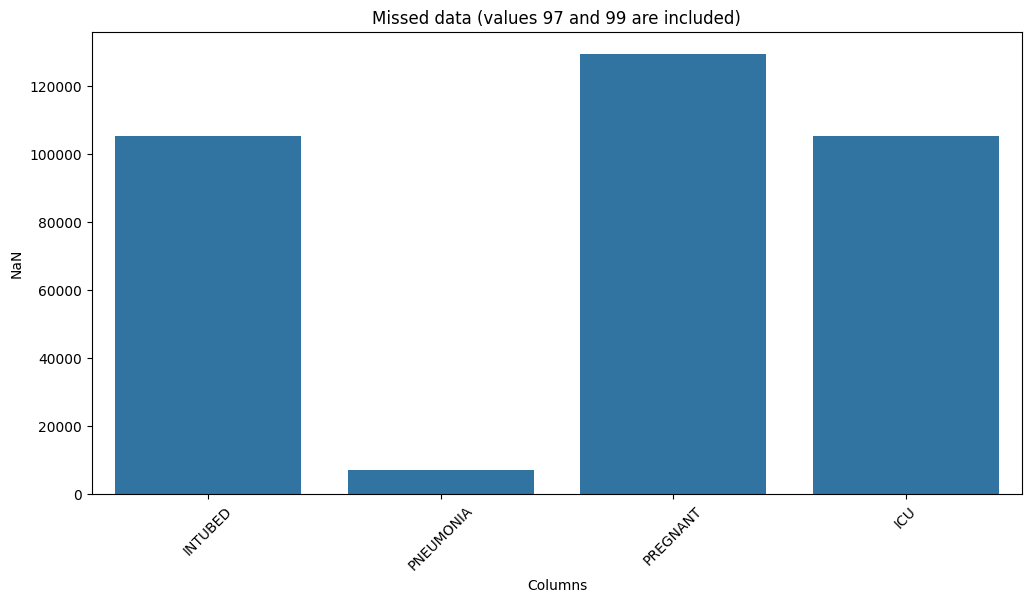

           Total NaN  Percentage NaN
INTUBED       105387       44.556201
PNEUMONIA       7187        3.038567
PREGNANT      129503       54.752120
ICU           105536       44.619196


In [8]:
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
if 'DATE_DIED' in numeric_cols:
    numeric_cols.remove('DATE_DIED')
if 'AGE' in numeric_cols:
    numeric_cols.remove('AGE')
data[numeric_cols] = data[numeric_cols].replace([97, 99], np.nan)

nan_summary = data.isna().sum()
nan_percentage = (nan_summary / len(data)) * 100
nan_info = pd.DataFrame({'Total NaN': nan_summary, 'Percentage NaN': nan_percentage})
nan_info = nan_info[nan_info['Total NaN'] > 0]

plt.figure(figsize=(12, 6))
sns.barplot(x=nan_info.index, y='Total NaN', data=nan_info)
plt.xticks(rotation=45)
plt.ylabel('NaN')
plt.xlabel('Columns')
plt.title('Missed data (values 97 and 99 are included)')
plt.show()
print(nan_info)

Colums with a lot of missing values (>40%) should be deleted

In [9]:
data = data.dropna(axis=1, thresh=len(data) * 0.6)
print(data)

         USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  PNEUMONIA  AGE  \
0            2             1    1             1  03/05/2020        1.0   65   
1            2             1    2             1  03/06/2020        1.0   72   
2            2             1    2             2  09/06/2020        2.0   55   
3            2             1    1             1  12/06/2020        2.0   53   
4            2             1    2             1  21/06/2020        2.0   68   
...        ...           ...  ...           ...         ...        ...  ...   
1048568      1            13    2             1  9999-99-99        2.0   47   
1048569      1            13    1             2  9999-99-99        2.0   56   
1048571      1            13    2             2  9999-99-99        2.0   51   
1048572      2            13    2             1  9999-99-99        2.0   55   
1048574      2            13    2             1  9999-99-99        2.0   52   

         DIABETES  COPD  ASTHMA  INMSUPR  HIPERTENS

Lets decide what to do with column where there is not so many missed values

In [10]:
data = data[~data["PNEUMONIA"].isin([97, 99]) & data["PNEUMONIA"].notna()]


In [11]:
data[data['PNEUMONIA'].isna()]['SEX'].value_counts(normalize=True)

Series([], Name: proportion, dtype: float64)

In [12]:
data[data['PNEUMONIA'].isna()]['AGE'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: AGE, dtype: float64

In [13]:
data[data['PNEUMONIA']==1]['AGE'].describe()

count    99730.000000
mean        56.913707
std         17.717090
min          0.000000
25%         46.000000
50%         58.000000
75%         69.000000
max        120.000000
Name: AGE, dtype: float64

In [14]:
data[data['PNEUMONIA']==2]['AGE'].describe()

count    129609.000000
mean         49.853127
std          19.541605
min           0.000000
25%          36.000000
50%          50.000000
75%          64.000000
max         121.000000
Name: AGE, dtype: float64

We can see that mean of column Age with missing values of pneumonia and mean of column Age without pneumonia(value 2) is much more similar than people with pneumonia(value 1).
So to avoid deletion of 7187 records we changed it to values 2.

In [15]:
data['PNEUMONIA'].fillna(2, inplace=True)

Outliers

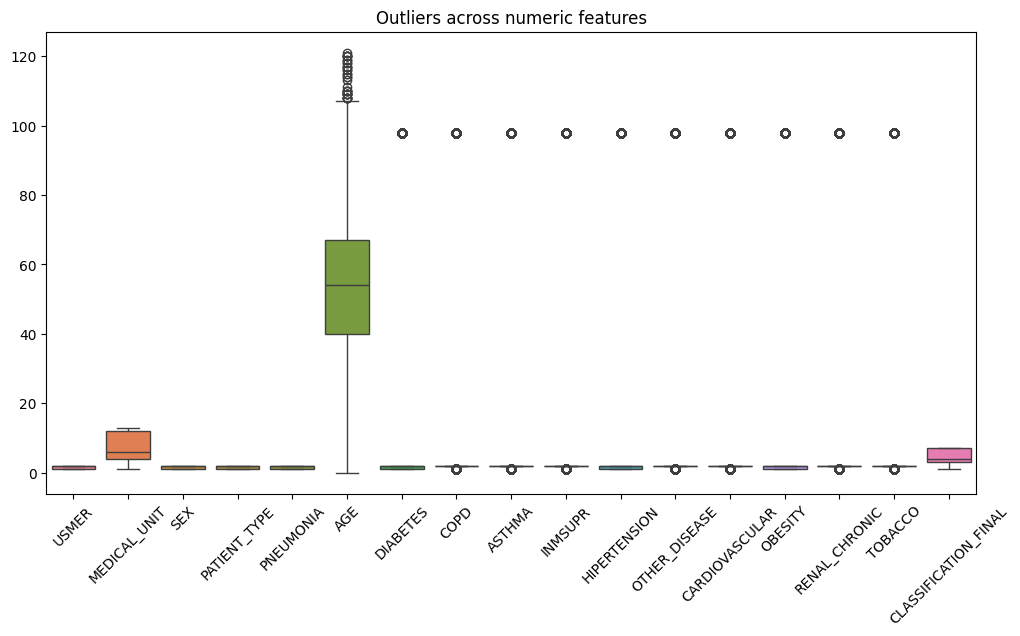

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data.select_dtypes(include=[np.number]))
plt.title('Outliers across numeric features')
plt.xticks(rotation=45)
plt.show()

Due too data leakage we should delete column: date_died. It is result after out target value. We cannot use it to classify new data.

In [17]:
data = data.drop(columns=['DATE_DIED'])

## Data analysis on cleaned data

In [18]:
print(f"Record count: {data.shape[0]}, Attribute count: {data.shape[1]}\n{data.dtypes}")

Record count: 229339, Attribute count: 17
USMER                     int64
MEDICAL_UNIT              int64
SEX                       int64
PATIENT_TYPE              int64
PNEUMONIA               float64
AGE                       int64
DIABETES                  int64
COPD                      int64
ASTHMA                    int64
INMSUPR                   int64
HIPERTENSION              int64
OTHER_DISEASE             int64
CARDIOVASCULAR            int64
OBESITY                   int64
RENAL_CHRONIC             int64
TOBACCO                   int64
CLASSIFICATION_FINAL      int64
dtype: object


In [19]:
data['PNEUMONIA'] = data['PNEUMONIA'].astype(int)

Lets look on correlation between attributes

<Axes: >

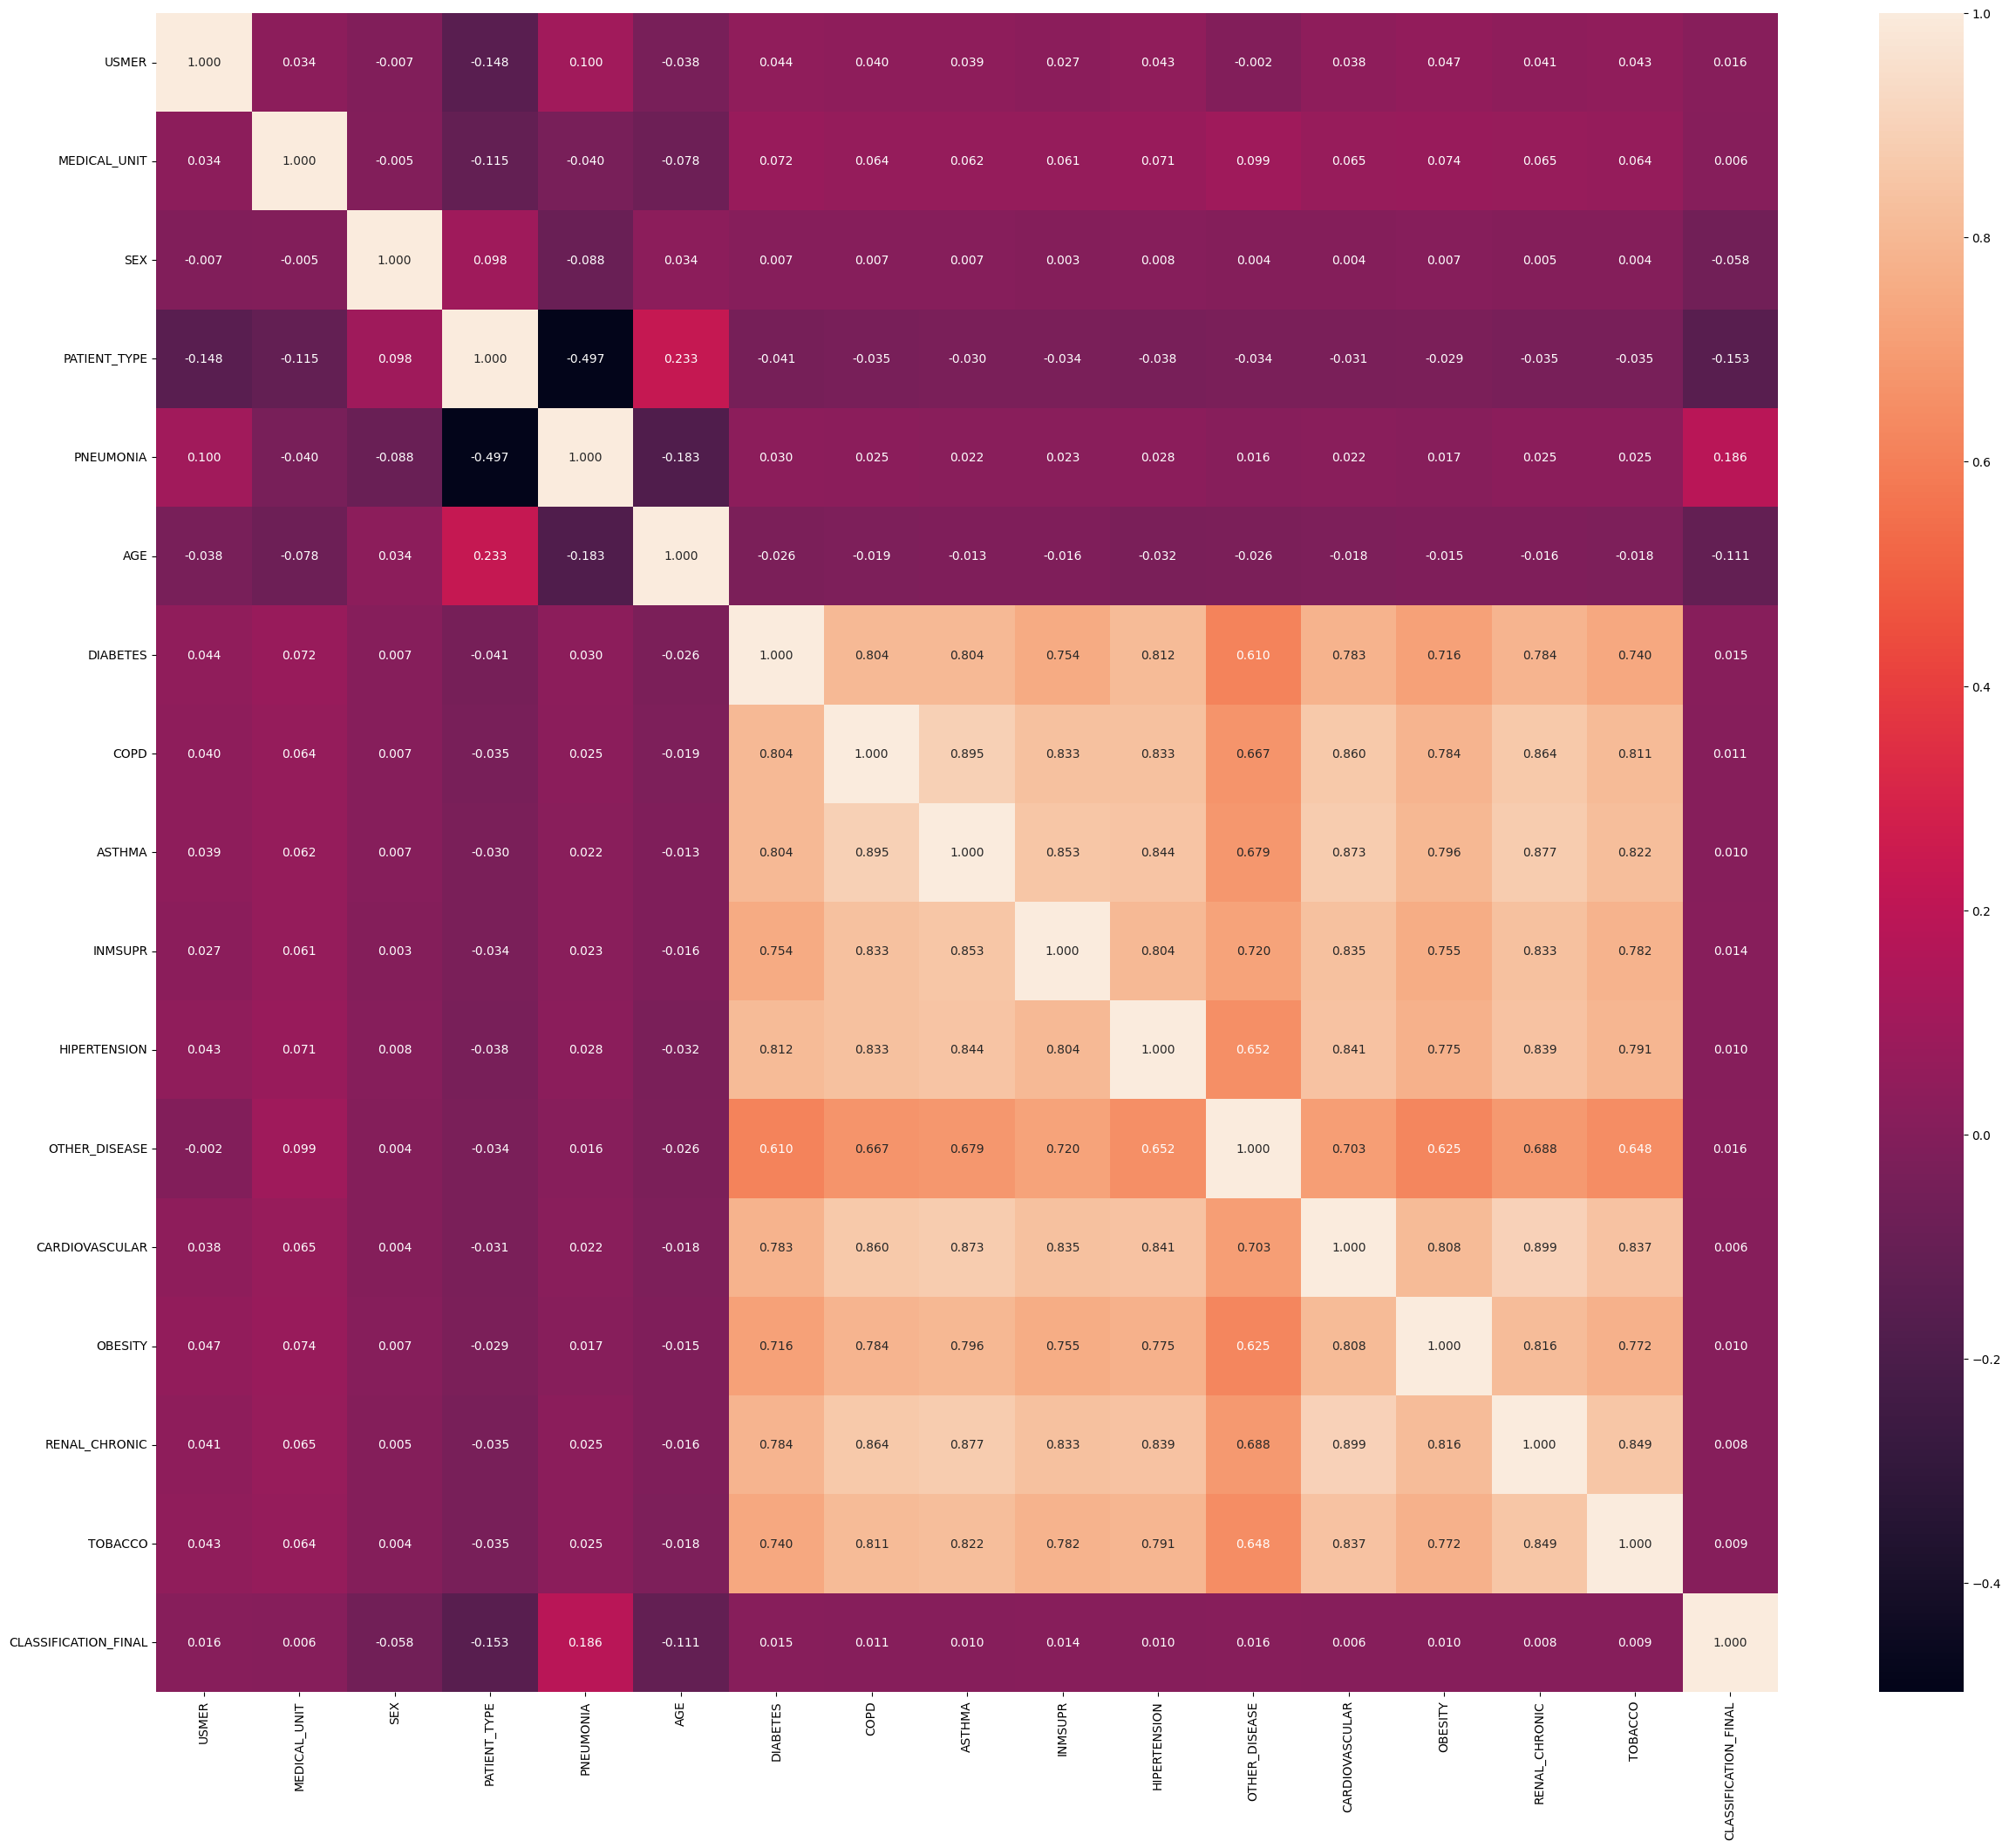

In [20]:
fig, ax = plt.subplots(figsize=(30,25))
sns.heatmap(data.corr(), ax=ax, annot=True, fmt=".3f")

Main attributes (have the biggest dependencies with our target value CLASSIFICATION_FINAL) are: **PNEUMONIA, OTHER_DISEASE, DIABETES, INMSUPR**

**Hypothesis**

Null Hypothesis (**H0**):

The variables age and classification_final are independent.
The presence of age is not associated with the level of patient classification.

Alternative Hypothesis (**H1**):

The variables are dependent.
The presence of age is associated with the level of patient classification.

In [21]:
table = pd.crosstab(data['AGE'], data['CLASSIFICATION_FINAL'])
chi2, p, dof, expected = chi2_contingency(table)
print(f"Chi-Square test for AGE")
print(f"Test result {chi2:.3f}, p-value = {p:.5f}, dof = {dof}")
    
if p < 0.05:
    print(f"There IS a significant relationship between AGE and CLASSIFICATION_FINAL.\n")
else:
    print(f"There is NO significant relationship between AGE and CLASSIFICATION_FINAL.\n")

Chi-Square test for AGE
Test result 8656.253, p-value = 0.00000, dof = 720
There IS a significant relationship between AGE and CLASSIFICATION_FINAL.



Based on the results of the Chi-square test, the obtained p-value is less than 0.05.
Therefore, we reject the null hypothesis and accept the alternative hypothesis.
This indicates that there is a statistically significant association between the presence of AGE and the level of patient classification.

**Distribution of column AGE**

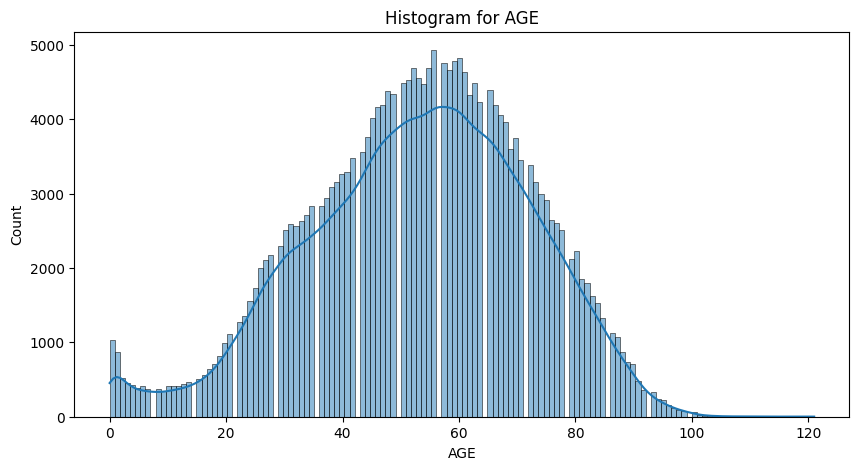

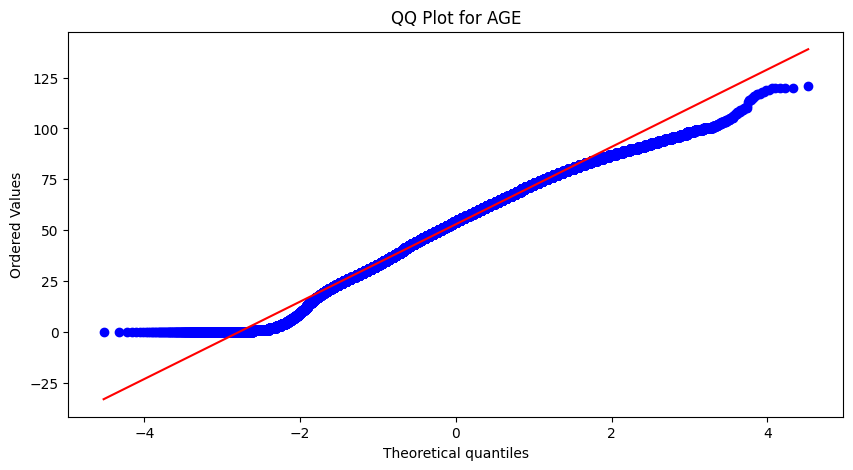

Shapiro-Wilk Test for AGE: Stat=0.991, p-value=0.000
The distribution of AGE is not normal.



In [22]:
plt.figure(figsize=(10, 5))
sns.histplot(data['AGE'], kde=True)
plt.title(f'Histogram for AGE')
plt.show()

plt.figure(figsize=(10, 5))
stats.probplot(data['AGE'], dist="norm", plot=plt)
plt.title(f'QQ Plot for AGE')
plt.show()

stat, p_value = stats.shapiro(data['AGE'])
print(f'Shapiro-Wilk Test for AGE: Stat={stat:.3f}, p-value={p_value:.3f}')
    
if p_value > 0.05:
    print(f'The distribution of AGE is normal.\n')
else:
    print(f'The distribution of AGE is not normal.\n')

In [23]:
data_MC = data.copy()

## Data split

The dataset divided into three parts:

70% for training,

15% for validation,

15% for testing.

In [128]:
X = data.drop(columns=['CLASSIFICATION_FINAL'])
y = data['CLASSIFICATION_FINAL']

In [129]:
val_size = 0.15
test_size = 0.15

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=test_size, stratify=y, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=val_size / (1 - test_size),
    stratify=y_temp, random_state=42
)


## Data normalization

All columns with values 1 and 2 were converted into binary format.

In [130]:
binary_cols = ['PNEUMONIA', 'DIABETES', 'INMSUPR', 'OTHER_DISEASE', 'TOBACCO', 'RENAL_CHRONIC', 'OBESITY', 'CARDIOVASCULAR', 'HIPERTENSION', 'ASTHMA', 'COPD']
data[binary_cols] = data[binary_cols].replace({2: 0})
X_test[binary_cols] = data[binary_cols].replace({2: 0})
X_val[binary_cols] = data[binary_cols].replace({2: 0})
X_train[binary_cols] = data[binary_cols].replace({2: 0})


All categorical features were transformed using one-hot encoding.

In [131]:
categorical_cols = ['SEX', 'PATIENT_TYPE', 'MEDICAL_UNIT']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True, dtype=int)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True, dtype=int)
X_val = pd.get_dummies(X_val, columns=categorical_cols, drop_first=True, dtype=int)
X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True, dtype=int)


data = data.rename(columns={
    'SEX_2': 'IS_MALE',
    'PATIENT_TYPE_2': 'IS_HOSPITALIZED'
})
X_test = X_test.rename(columns={
    'SEX_2': 'IS_MALE',
    'PATIENT_TYPE_2': 'IS_HOSPITALIZED'
})
X_val = X_val.rename(columns={
    'SEX_2': 'IS_MALE',
    'PATIENT_TYPE_2': 'IS_HOSPITALIZED'
})
X_train = X_train.rename(columns={
    'SEX_2': 'IS_MALE',
    'PATIENT_TYPE_2': 'IS_HOSPITALIZED'
})

AGE column was normalized using the Min-Max Scaler.

In [132]:
scaler = MinMaxScaler()
data['AGE'] = scaler.fit_transform(data[['AGE']])
X_test['AGE'] = scaler.fit_transform(X_test[['AGE']])
X_val['AGE'] = scaler.fit_transform(X_val[['AGE']])
X_train['AGE'] = scaler.fit_transform(X_train[['AGE']])

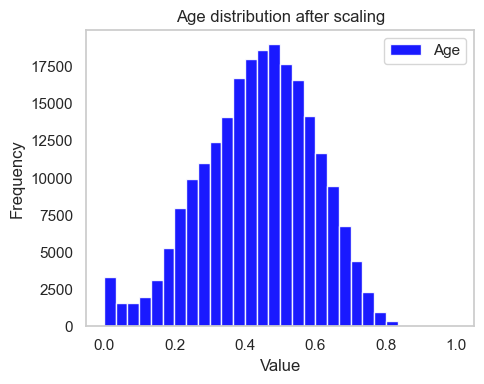

In [133]:
plt.figure(figsize=(5, 4)) 
plt.hist(data['AGE'], bins=30, alpha=0.9, color='blue')
plt.title("Age distribution after scaling")  
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend(["Age"])
plt.grid()
plt.tight_layout()
plt.show()

Target column is changed 
- 1–3 → 1 (positive COVID test)
- 4–7 → 0 (negative COVID test)

In [134]:
data['CLASSIFICATION_FINAL'] = data['CLASSIFICATION_FINAL'].apply(lambda x: 1 if x in [1, 2, 3] else 0)
y_train = y_train.apply(lambda x: 1 if x in [1, 2, 3] else 0)
y_val = y_val.apply(lambda x: 1 if x in [1, 2, 3] else 0)
y_test = y_test.apply(lambda x: 1 if x in [1, 2, 3] else 0)

In [135]:
y_train.head()

140755    1
59453     1
480496    1
741383    0
234507    0
Name: CLASSIFICATION_FINAL, dtype: int64

In [136]:
print(len(y_train))
print(f"Train record count: {X_train.shape[0]}, Attribute count: {X_train.shape[1]}\n{X_train.dtypes}")

160537
Train record count: 160537, Attribute count: 27
USMER                int64
PNEUMONIA            int64
AGE                float64
DIABETES             int64
COPD                 int64
ASTHMA               int64
INMSUPR              int64
HIPERTENSION         int64
OTHER_DISEASE        int64
CARDIOVASCULAR       int64
OBESITY              int64
RENAL_CHRONIC        int64
TOBACCO              int64
IS_MALE              int64
IS_HOSPITALIZED      int64
MEDICAL_UNIT_2       int64
MEDICAL_UNIT_3       int64
MEDICAL_UNIT_4       int64
MEDICAL_UNIT_5       int64
MEDICAL_UNIT_6       int64
MEDICAL_UNIT_7       int64
MEDICAL_UNIT_8       int64
MEDICAL_UNIT_9       int64
MEDICAL_UNIT_10      int64
MEDICAL_UNIT_11      int64
MEDICAL_UNIT_12      int64
MEDICAL_UNIT_13      int64
dtype: object


In [137]:
print(len(y_test))
print(f"Test record count: {X_test.shape[0]}, Attribute count: {X_test.shape[1]}\n{X_test.dtypes}")

34401
Test record count: 34401, Attribute count: 27
USMER                int64
PNEUMONIA            int64
AGE                float64
DIABETES             int64
COPD                 int64
ASTHMA               int64
INMSUPR              int64
HIPERTENSION         int64
OTHER_DISEASE        int64
CARDIOVASCULAR       int64
OBESITY              int64
RENAL_CHRONIC        int64
TOBACCO              int64
IS_MALE              int64
IS_HOSPITALIZED      int64
MEDICAL_UNIT_2       int64
MEDICAL_UNIT_3       int64
MEDICAL_UNIT_4       int64
MEDICAL_UNIT_5       int64
MEDICAL_UNIT_6       int64
MEDICAL_UNIT_7       int64
MEDICAL_UNIT_8       int64
MEDICAL_UNIT_9       int64
MEDICAL_UNIT_10      int64
MEDICAL_UNIT_11      int64
MEDICAL_UNIT_12      int64
MEDICAL_UNIT_13      int64
dtype: object


In [138]:
print(len(y_val))
print(f"Val record count: {X_val.shape[0]}, Attribute count: {X_val.shape[1]}\n{X_val.dtypes}")

34401
Val record count: 34401, Attribute count: 27
USMER                int64
PNEUMONIA            int64
AGE                float64
DIABETES             int64
COPD                 int64
ASTHMA               int64
INMSUPR              int64
HIPERTENSION         int64
OTHER_DISEASE        int64
CARDIOVASCULAR       int64
OBESITY              int64
RENAL_CHRONIC        int64
TOBACCO              int64
IS_MALE              int64
IS_HOSPITALIZED      int64
MEDICAL_UNIT_2       int64
MEDICAL_UNIT_3       int64
MEDICAL_UNIT_4       int64
MEDICAL_UNIT_5       int64
MEDICAL_UNIT_6       int64
MEDICAL_UNIT_7       int64
MEDICAL_UNIT_8       int64
MEDICAL_UNIT_9       int64
MEDICAL_UNIT_10      int64
MEDICAL_UNIT_11      int64
MEDICAL_UNIT_12      int64
MEDICAL_UNIT_13      int64
dtype: object


In [139]:
data

USMER  PNEUMONIA       AGE  DIABETES  COPD  ASTHMA  INMSUPR  \
0            2          1  0.537190         0     0       0        0   
1            2          1  0.595041         0     0       0        0   
2            2          0  0.454545         1     0       0        0   
3            2          0  0.438017         0     0       0        0   
4            2          0  0.561983         1     0       0        0   
...        ...        ...       ...       ...   ...     ...      ...   
1048568      1          0  0.388430         1     0       0        0   
1048569      1          0  0.462810         1     0       0        0   
1048571      1          0  0.421488         0     0       0        0   
1048572      2          0  0.454545         0     0       0        0   
1048574      2          0  0.429752         0     0       0        0   

         HIPERTENSION  OTHER_DISEASE  CARDIOVASCULAR  ...  MEDICAL_UNIT_4  \
0                   1              0               0  ...               0   
1                   1              0               0  ...               0   
2                   0              0               0  ...               0   
3                   0              0               0  ...               0   
4                   1              0               0  ...               0   
...               ...            ...             ...  ...             ...   
1048568             0              0               0  ...               0   
1048569             0              0               0  ...               0   
1048571             1              0               0  ...               0   
1048572             0              0               0  ...               0   
1048574             0              0               0  ...               0   

         MEDICAL_UNIT_5  MEDICAL_UNIT_6  MEDICAL_UNIT_7  MEDICAL_UNIT_8  \
0                     0               0               0               0   
1                     0               0               0               0   
2                     0               0               0               0   
3                     0               0               0               0   
4                     0               0               0               0   
...                 ...             ...             ...             ...   
1048568               0               0               0               0   
1048569               0               0               0               0   
1048571               0               0               0               0   
1048572               0               0               0               0   
1048574               0               0               0               0   

         MEDICAL_UNIT_9  MEDICAL_UNIT_10  MEDICAL_UNIT_11  MEDICAL_UNIT_12  \
0                     0                0                0                0   
1                     0                0                0                0   
2                     0                0                0                0   
3                     0                0                0                0   
4                     0                0                0                0   
...                 ...              ...              ...              ...   
1048568               0                0                0                0   
1048569               0                0                0                0   
1048571               0                0                0                0   
1048572               0                0                0                0   
1048574               0                0                0                0   

         MEDICAL_UNIT_13  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  
...                  ...  
1048568                1  
1048569                1  
1048571                1  
1048572                1  
1048574                1  

[229339 rows x 28 columns]

Lets look on correlation between attributes on normalized data

<Axes: >

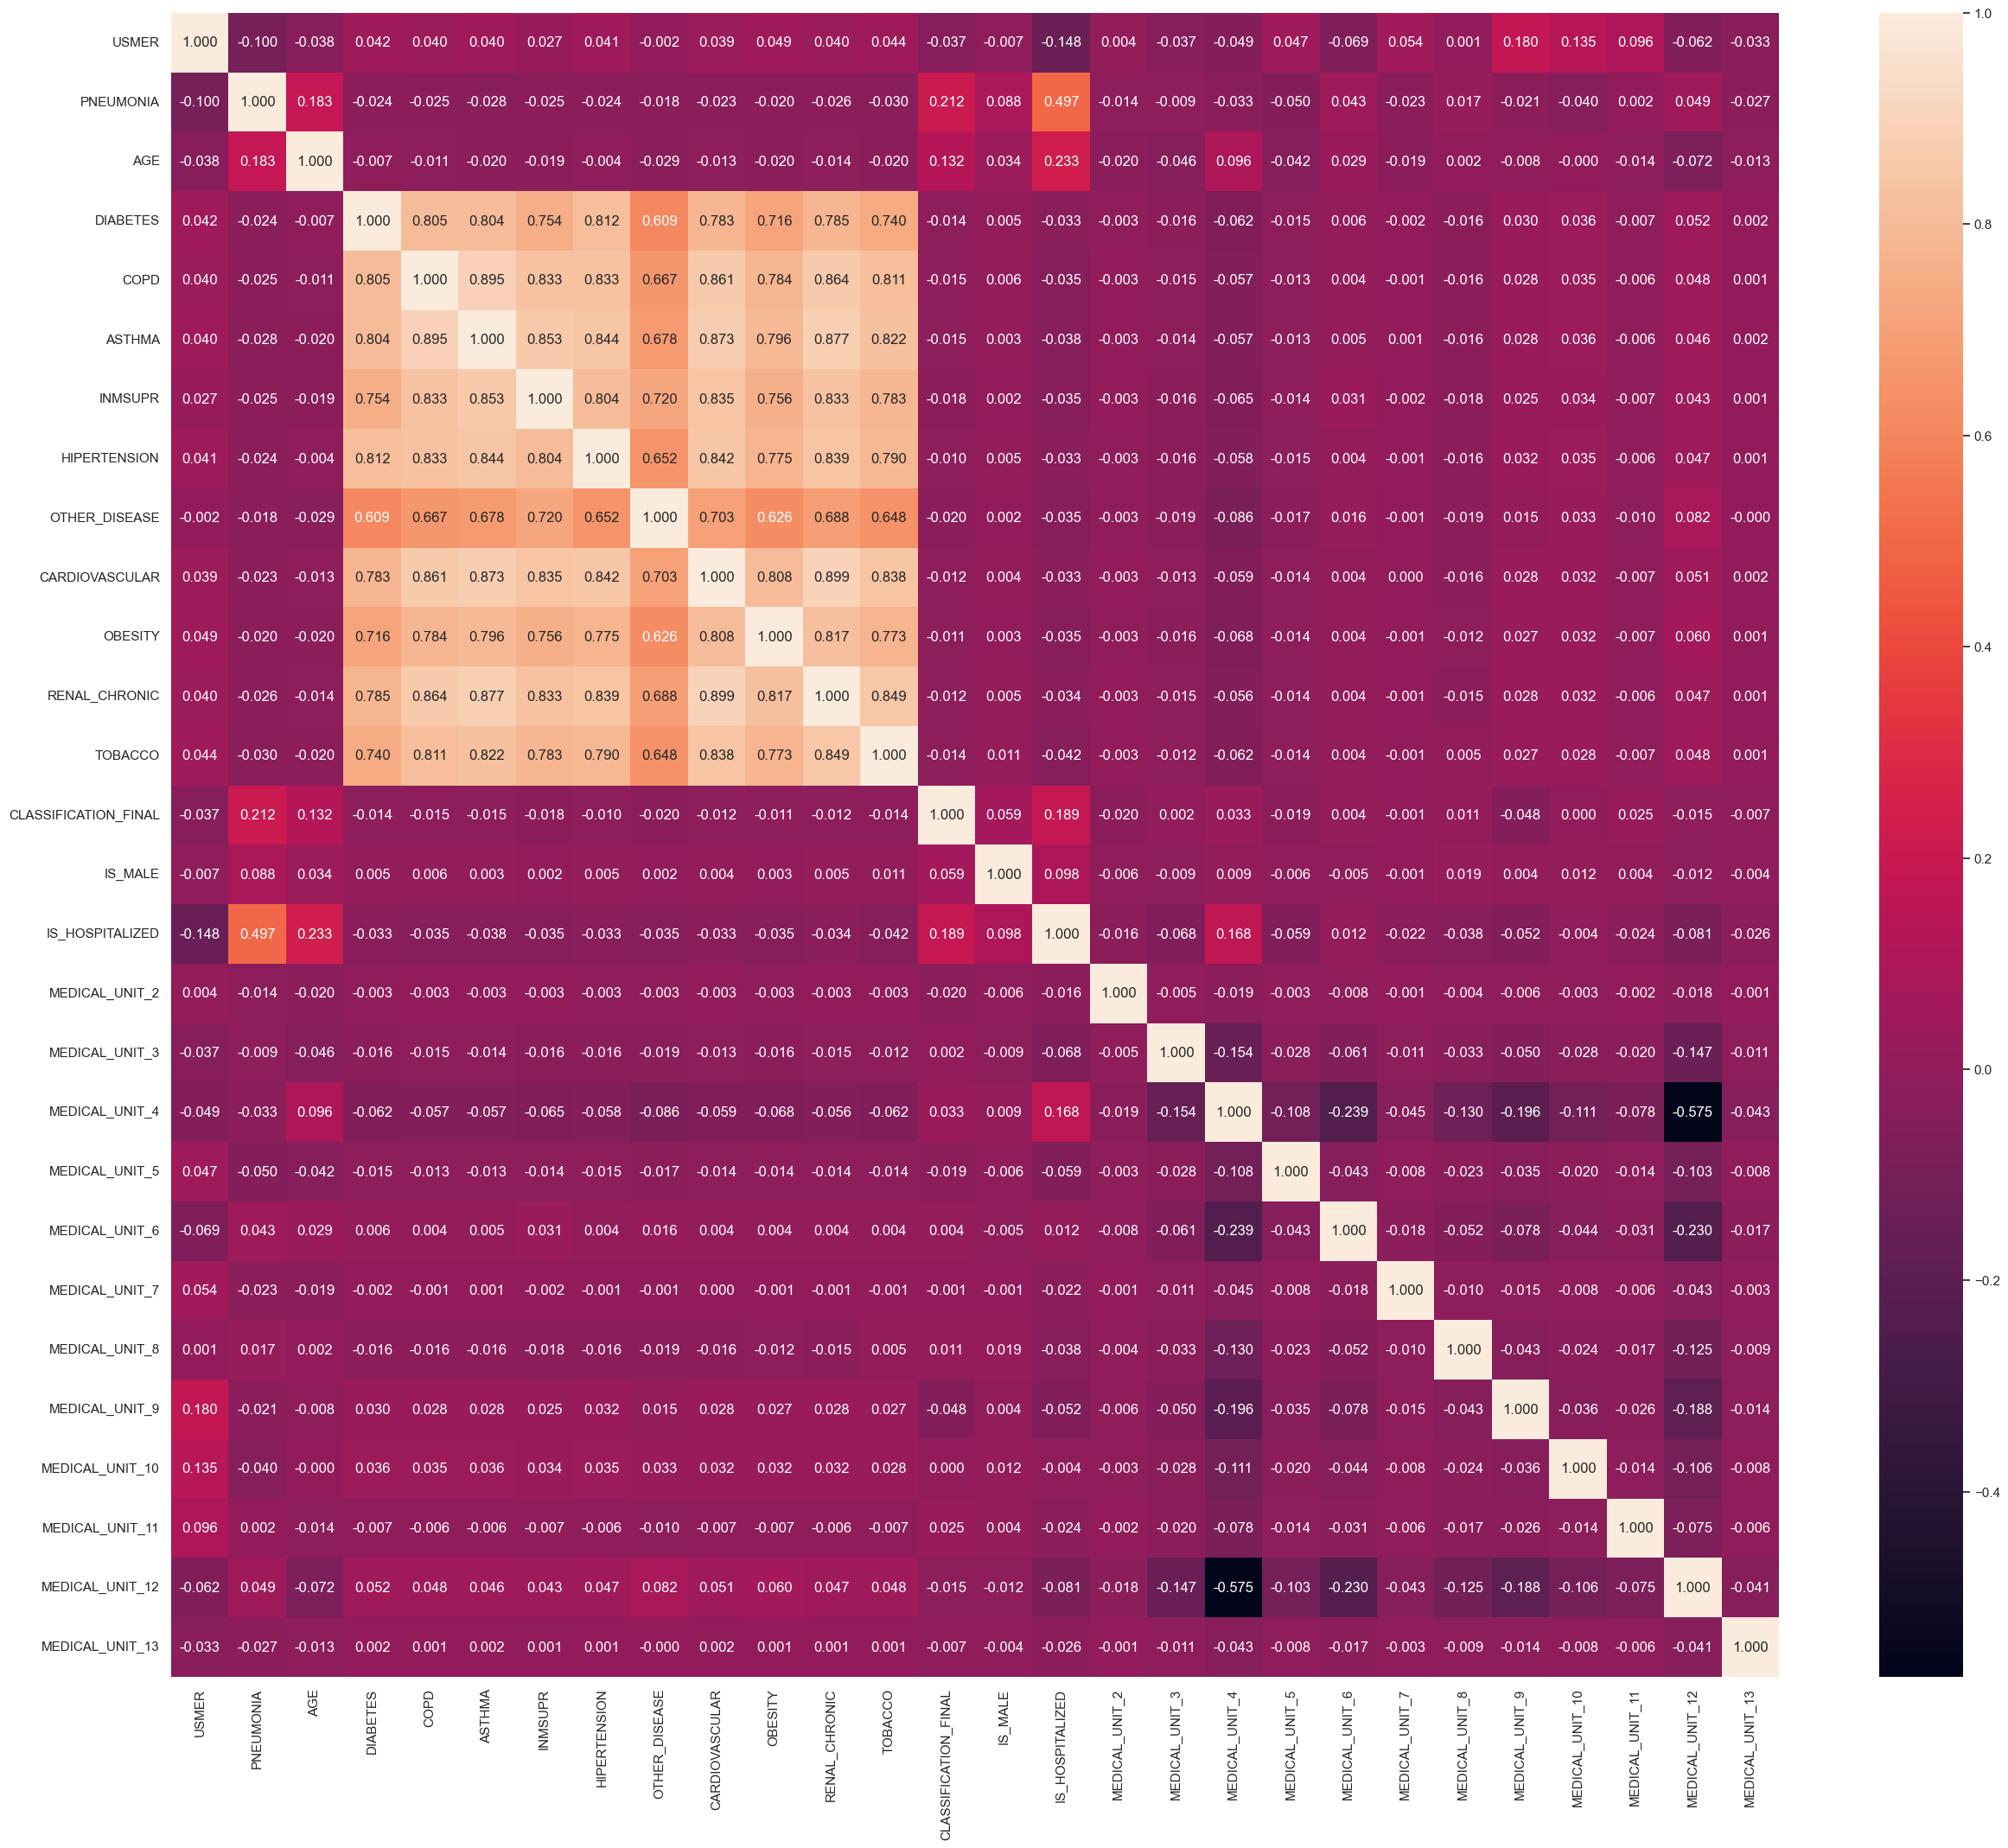

In [140]:
fig, ax = plt.subplots(figsize=(30,25))
sns.heatmap(data.corr(), ax=ax, annot=True, fmt=".3f")

Main attributes (have the biggest dependencies with our target value CLASSIFICATION_FINAL) are: **PNEUMONIA, AGE, IS_HOSPITALIZED**

**Hypothesis**

Null Hypothesis (**H0**):

The attributes: PNEUMONIA, AGE, IS_HOSPITALIZED and classification_final are independent.
The presence of attributes is not associated with the level of patient classification.

Alternative Hypothesis (**H1**):

The attributes: PNEUMONIA, AGE, IS_HOSPITALIZED are dependent.
The presence of attributes is associated with the level of patient classification.

In [141]:
cols = ['AGE', 'IS_HOSPITALIZED', 'PNEUMONIA'] 
target = 'CLASSIFICATION_FINAL'

for col in cols:
    table = pd.crosstab(data[col], data[target])
    chi2, p, dof, expected = chi2_contingency(table)
    
    print(f"Chi-Square test for {col}")
    print(f"Test result {chi2:.3f}, p-value = {p:.5f}, dof = {dof}")
    
    if p < 0.05:
        print(f"There IS a significant relationship between {col} and {target}.\n")
    else:
        print(f"There is NO significant relationship between {col} and {target}.\n")

Chi-Square test for AGE
Test result 6235.315, p-value = 0.00000, dof = 120
There IS a significant relationship between AGE and CLASSIFICATION_FINAL.

Chi-Square test for IS_HOSPITALIZED
Test result 8195.963, p-value = 0.00000, dof = 1
There IS a significant relationship between IS_HOSPITALIZED and CLASSIFICATION_FINAL.

Chi-Square test for PNEUMONIA
Test result 10298.019, p-value = 0.00000, dof = 1
There IS a significant relationship between PNEUMONIA and CLASSIFICATION_FINAL.



In [142]:
X_train.to_csv("X_train.csv", index=False)
X_val.to_csv("X_val.csv", index=False)
X_test.to_csv("X_test.csv", index=False)

y_train.to_csv("y_train.csv", index=False)
y_val.to_csv("y_val.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

The data normalization process has been completed.
As a result, all features are now numerical and scaled.

Our dataset is fully ready to be fed into the model.

## Configuration

This cell creates a configuration for training a baseline MLP model.
It defines model structure (layers, activation, dropout, BN),
training parameters (batch size, epochs, learning rate, early stopping),
and experiment metadata. The config is saved to and loaded from a JSON file.

In [143]:
import json

config_data = {
    "model": {
        "input_dim": 27,
        "hidden_layers": [128, 64, 32],
        "activation": "relu",
        "output_activation": "sigmoid",
        "dropout_rate": 0.3,
        "batch_norm": True,
        "skip_connection": False,
        "bottleneck": False
    },
    "training": {
        "batch_size": 64,
        "epochs": 30,
        "learning_rate": 0.001,
        "optimizer": "adam",
        "early_stopping": True,
        "patience": 5
    },
    "experiment": {
        "name": "baseline_mlp_dropout_bn",
        "description": "Baseline model with dropout and BN"
    }
}

with open("config.json", "w") as f:
    json.dump(config_data, f, indent=4)

with open("config.json", "r") as f:
    config = json.load(f)


## Experiment tracking

This cell defines a helper function for saving experiment results.
It stores the model’s metrics, configuration, experiment name, and timestamp
in a JSON file called "experiments_log.json".

If the file already exists, the new result is added to it. This helps compare
different experiments later.


In [144]:
from datetime import datetime


def log_experiment(metrics, config, filename="experiments_log.json"):
    entry = {
        "timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        "experiment_name": config["experiment"]["name"],
        "description": config["experiment"]["description"],
        "config": config,
        "metrics": metrics
    }

    try:
        with open(filename, "r") as f:
            logs = json.load(f)
    except FileNotFoundError:
        logs = []

    logs.append(entry)
    with open(filename, "w") as f:
        json.dump(logs, f, indent=4)

In [2]:
import pandas as pd
X_train = pd.read_csv("X_train.csv")
X_val = pd.read_csv("X_val.csv")
X_test = pd.read_csv("X_test.csv")

y_train = pd.read_csv("y_train.csv").squeeze() 
y_val = pd.read_csv("y_val.csv").squeeze()
y_test = pd.read_csv("y_test.csv").squeeze()

## Experiments - meaningful based on the results of previous experiments
## Including improvement techniques (e.g. Dropout, Normalization layers, Skip Connections, Bottleneck Layers, …)

 This cell checks class distribution in the training set
 and creates class weights if the dataset is imbalanced.
 Class weights help the model pay more attention to the minority class.


In [5]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers, callbacks, optimizers
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import f1_score
import wandb
import os

**Experiments with wandb**

In [6]:
def train_experiment(
    project_name="covid_classification",
    experiment_name="default_run",
    model_type="a",
    input_dim=27,
    hidden_layers=[128, 64, 32],
    activation="relu",
    output_activation="sigmoid",
    dropout_rate=0.3,
    batch_norm=True,
    bottleneck=False,
    batch_size=64,
    epochs=30,
    learning_rate=1e-3,
    optimizer_type="adam",
    patience=5,
    weight_decay=1e-5,
    smooth_weight=0.8
):

    os.environ["WANDB_START_METHOD"] = "thread"
    wandb.init(
        project=project_name,
        name=experiment_name,
        config=locals(),
        settings=wandb.Settings(start_method="thread", init_timeout=300)
    )

    cfg = wandb.config

    def smooth(new, last, weight=smooth_weight):
        return last * weight + (1 - weight) * new

    def build_mlp_a(input_dim):
        inputs = layers.Input(shape=(input_dim,))
        x = layers.Dense(512, kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(1e-5))(inputs)
        x = layers.LeakyReLU(0.1)(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(0.1)(x)
        x = layers.Dense(256, kernel_initializer='he_normal')(x)
        x = layers.LeakyReLU(0.1)(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dense(128, kernel_initializer='he_normal')(x)
        x = layers.LeakyReLU(0.1)(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dense(64, kernel_initializer='he_normal')(x)
        x = layers.LeakyReLU(0.1)(x)
        outputs = layers.Dense(1, activation='sigmoid')(x)
        return tf.keras.Model(inputs, outputs)

    def build_mlp_b(cfg):
        model = tf.keras.Sequential()
        model.add(layers.Input(shape=(cfg.input_dim,)))
        for units in cfg.hidden_layers:
            model.add(layers.Dense(units, activation=cfg.activation, kernel_initializer="he_normal"))
            if cfg.batch_norm:
                model.add(layers.BatchNormalization())
            if cfg.dropout_rate > 0:
                model.add(layers.Dropout(cfg.dropout_rate))
        if cfg.bottleneck:
            model.add(layers.Dense(16, activation=cfg.activation))
        model.add(layers.Dense(1, activation=cfg.output_activation))
        return model

    if model_type == "a":
        model = build_mlp_a(input_dim)
        opt = AdamW(learning_rate=learning_rate, weight_decay=weight_decay)
    else:
        model = build_mlp_b(cfg)
        if optimizer_type.lower() == "adamw":
            opt = AdamW(learning_rate=learning_rate, weight_decay=weight_decay)
        elif optimizer_type.lower() == "adam":
            opt = optimizers.Adam(learning_rate=learning_rate)
        elif optimizer_type.lower() == "sgd":
            opt = optimizers.SGD(learning_rate=learning_rate, momentum=0.9, nesterov=True)
        else:
            raise ValueError("Unsupported optimizer")

    model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])
    cb = [
        callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-6),
        callbacks.EarlyStopping(monitor="val_loss", patience=patience, restore_best_weights=True)
    ]

    last_acc, last_prec, last_rec, last_f1 = 0, 0, 0, 0

    for epoch in range(cfg.epochs):
        history = model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=1,
            batch_size=cfg.batch_size,
            verbose=0,
            callbacks=cb
        )

        y_pred = (model.predict(X_val, verbose=0) > 0.5).astype(int).ravel()
        y_true = np.array(y_val).astype(int).ravel()

        acc = accuracy_score(y_true, y_pred)
        prec = precision_score(y_true, y_pred, zero_division=0)
        rec = recall_score(y_true, y_pred, zero_division=0)
        f1 = f1_score(y_true, y_pred, zero_division=0)

        last_acc = smooth(acc, last_acc)
        last_prec = smooth(prec, last_prec)
        last_rec = smooth(rec, last_rec)
        last_f1 = smooth(f1, last_f1)

        wandb.log({
            "epoch": epoch + 1,
            "loss": history.history["loss"][0],
            "val_loss": history.history["val_loss"][0],
            "accuracy": last_acc,
            "precision": last_prec,
            "recall": last_rec,
            "f1": last_f1,
            "learning_rate": model.optimizer.learning_rate.numpy()
        })

    wandb.finish()
    return model

In [7]:
model = train_experiment(
    experiment_name="test",
    model_type="b",
    optimizer_type="adamw",
    learning_rate=1e-4,
    epochs=40
)

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: podolskyna (podolskyna-slovak-university-of-technology). Use `wandb login --relogin` to force relogin


In [8]:
model_a = train_experiment(
    experiment_name="test_a_model",
    model_type="a",
    optimizer_type="adamw",
    learning_rate=1e-4,
    epochs=40
)

In [9]:
model2 = train_experiment(
    experiment_name="test_no_bn_dropout",
    model_type="b",
    optimizer_type="adam",        
    learning_rate=1e-3,
    batch_norm=False, 
    dropout_rate=0.0,
    epochs=40
)

In [10]:
model3 = train_experiment(
    experiment_name="test_bottleneck",
    model_type="b",
    optimizer_type="adamw",
    learning_rate=1e-4,
    bottleneck=True,
    batch_norm=True,
    dropout_rate=0.2,
    epochs=40
)

In [11]:
model4 = train_experiment(
    experiment_name="test_sgd_momentum",
    model_type="b",
    optimizer_type="sgd",
    learning_rate=5e-3,
    batch_norm=True,
    dropout_rate=0.3,
    epochs=40
)

This block calculates class weights for imbalanced data.
Class weights help the model pay more attention to the minority class during training.

In [149]:
print("Class balance in y_train:", y_train.value_counts(normalize=True))
if (y_train == 1).mean() < 0.4 or (y_train == 1).mean() > 0.6:
    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    class_weight_dict = dict(enumerate(class_weights))
else:
    class_weight_dict = None
    print("Classes are balanced, no class_weight needed.")

Class balance in y_train: CLASSIFICATION_FINAL
0    0.506039
1    0.493961
Name: proportion, dtype: float64
Classes are balanced, no class_weight needed.


### What the `build_mlp(cfg)` function does

This function creates an MLP neural network using settings from the `cfg` dictionary.

- First, it makes the input layer.
- Then it builds the hidden layers from `hidden_layers`: Dense → (BatchNorm if enabled) → (Dropout if > 0).
- If skip connections are enabled, every second layer can connect (add) to a previous one with the same size.
- If `bottleneck=True`, it adds an extra Dense layer with 16 units.
- The last layer is a single neuron with sigmoid activation (for binary classification).
- The function shows the model summary and returns the model.


In [150]:
def build_mlp(cfg):
    inputs = layers.Input(shape=(cfg["input_dim"],))
    x = inputs
    skips = []

    for i, units in enumerate(cfg["hidden_layers"]):
        x = layers.Dense(units, activation=cfg["activation"])(x)
        if cfg["batch_norm"]:
            x = layers.BatchNormalization()(x)
        if cfg["dropout_rate"] > 0:
            x = layers.Dropout(cfg["dropout_rate"])(x)
        if cfg["skip_connection"] and i % 2 == 0:
            if skips and x.shape[-1] == skips[-1].shape[-1]:
                x = layers.Add()([x, skips[-1]])
            skips.append(x)

    if cfg["bottleneck"]:
        x = layers.Dense(16, activation=cfg["activation"])(x)

    outputs = layers.Dense(1, activation=cfg["output_activation"])(x)
    model = tf.keras.Model(inputs, outputs)
    model.summary()
    return model



 ### This block defines a reusable functions to run experiments


In [151]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, auc as sk_auc

#### Function: `build_and_compile_model(config)`
Creates an MLP model using parameters from `config["model"]`.  
Then compiles it with Adam optimizer, binary cross-entropy loss and metrics like accuracy, AUC, precision and recall.

In [152]:
def build_and_compile_model(config):
    model_cfg = config["model"]
    model = build_mlp(model_cfg)
    optimizer = optimizers.Adam(learning_rate=config["training"]["learning_rate"])
    model.compile(optimizer=optimizer, loss="binary_crossentropy",
                  metrics=["accuracy", tf.keras.metrics.AUC(name='auc'),
                           tf.keras.metrics.Precision(name='precision'),
                           tf.keras.metrics.Recall(name='recall')])
    return model

#### Function: `train_model(model, train_cfg, X_train, y_train, X_val, y_val, class_weight=None)`
Trains the compiled model on the training set.  
Uses validation data and EarlyStopping if it's enabled in the config.  
Returns the `history` object from Keras.

In [153]:
def train_model(model, train_cfg, X_train, y_train, X_val, y_val, class_weight=None):
    callbacks = []
    if train_cfg["early_stopping"]:
        callbacks.append(EarlyStopping(monitor="val_loss", patience=train_cfg["patience"],
                                       restore_best_weights=True))
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=train_cfg["epochs"],
        batch_size=train_cfg["batch_size"],
        callbacks=callbacks,
        class_weight=class_weight,
        verbose=0
    )
    return history

#### Function: `analyze_history(history)`
Converts training history into a DataFrame and prints useful stats:  
- Min validation loss  
- Best validation accuracy, AUC, precision, recall  
Helps to understand at which epoch the model performed best.

In [154]:
def analyze_history(history):
    history_df = pd.DataFrame(history.history)
    print("Training History Summary:")
    print(history_df.describe())
    print("\nBest Validation Metrics:")
    print(f"Best Val Loss: {history_df['val_loss'].min():.4f} at epoch {history_df['val_loss'].idxmin() + 1}")
    print(f"Best Val Accuracy: {history_df['val_accuracy'].max():.4f} at epoch {history_df['val_accuracy'].idxmax() + 1}")
    print(f"Best Val AUC: {history_df['val_auc'].max():.4f} at epoch {history_df['val_auc'].idxmax() + 1}")
    if 'val_precision' in history_df:
        print(f"Best Val Precision: {history_df['val_precision'].max():.4f} at epoch {history_df['val_precision'].idxmax() + 1}")
    if 'val_recall' in history_df:
        print(f"Best Val Recall: {history_df['val_recall'].max():.4f} at epoch {history_df['val_recall'].idxmax() + 1}")
    return history_df

#### Function: `visualize_results(history_df, config, model, X_test, y_test)`
Creates training visualisations:
- Loss, Accuracy, AUC, Precision, Recall over epochs  
- ROC curve on the test set  
Returns predicted probabilities (`y_pred_prob`) for evaluation.

In [155]:
def visualize_results(history_df, config, model, X_test, y_test):
    sns.set(style="whitegrid")
    plt.figure(figsize=(18, 10))
    plt.suptitle(f"Training Results: {config['experiment']['name']}", fontsize=16)
    # Loss
    plt.subplot(2, 3, 1)
    sns.lineplot(data=history_df[['loss', 'val_loss']])
    plt.title("Loss Curves")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    # Accuracy
    plt.subplot(2, 3, 2)
    sns.lineplot(data=history_df[['accuracy', 'val_accuracy']])
    plt.title("Accuracy Curves")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    # AUC
    if 'auc' in history_df:
        plt.subplot(2, 3, 3)
        sns.lineplot(data=history_df[['auc', 'val_auc']])
        plt.title("AUC Curves")
        plt.xlabel("Epochs")
        plt.ylabel("AUC")
    # Precision
    if 'precision' in history_df:
        plt.subplot(2, 3, 4)
        sns.lineplot(data=history_df[['precision', 'val_precision']])
        plt.title("Precision Curves")
        plt.xlabel("Epochs")
        plt.ylabel("Precision")
    # Recall
    if 'recall' in history_df:
        plt.subplot(2, 3, 5)
        sns.lineplot(data=history_df[['recall', 'val_recall']])
        plt.title("Recall Curves")
        plt.xlabel("Epochs")
        plt.ylabel("Recall")
    # ROC Curve
    plt.subplot(2, 3, 6)
    y_pred_prob = model.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = sk_auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title("ROC Curve (Test Set)")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()
    return y_pred_prob  # Return probabilities for evaluation

#### Function: `evaluate_model(model, X_test, y_test, history, y_pred_prob)`
Evaluates the model on the test data.  
Calculates:
- Loss, Accuracy, AUC, Precision, Recall, F1-score  
- Confusion Matrix  
Also checks if there is overfitting.  
Returns all metrics in a dictionary.

In [156]:
def evaluate_model(model, X_test, y_test, history, y_pred_prob):
    final_train_loss = history.history['loss'][-1]
    final_val_loss = history.history['val_loss'][-1]
    if final_val_loss > final_train_loss * 1.2:
        print("⚠ Warning: Possible overfitting detected")
    y_pred = (y_pred_prob > 0.5).astype(int)
    loss, acc, auc, prec, rec = model.evaluate(X_test, y_test, verbose=0)
    f1 = f1_score(y_test, y_pred)
    print("\nTest Metrics:")
    print(f"Loss: {loss:.4f}")
    print(f"Accuracy: {acc:.4f}")
    print(f"AUC: {auc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-Score: {f1:.4f}")
    cm = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(cm)
    metrics = {
        "loss": loss, "accuracy": acc, "auc": auc,
        "precision": prec, "recall": rec, "f1": f1
    }
    return metrics

#### Function: `log_and_return(model, metrics, config)`
Prints the final experiment result in a short format.  
Logs metrics + config to `experiments_log.json`.  
Returns the model and metrics.

In [157]:
def log_and_return(model, metrics, config):
    print(f"✅ {config['experiment']['name']} -> acc={metrics['accuracy']:.3f}, auc={metrics['auc']:.3f}, f1={metrics['f1']:.3f}")
    log_experiment(metrics, config)
    return model, metrics

### Function: `run_experiment(config, class_weight=None)`
Main function that runs the full experiment pipeline:  
1. Builds and compiles the model  
2. Trains it  
3. Shows training stats and plots  
4. Evaluates on test data  
5. Logs everything  
Returns the trained model and evaluation metrics.

In [158]:
def run_experiment(config, class_weight=None):
    train_cfg = config["training"]
    model = build_and_compile_model(config)
    history = train_model(model, train_cfg, X_train, y_train, X_val, y_val, class_weight)
    history_df = analyze_history(history)
    y_pred_prob = visualize_results(history_df, config, model, X_test, y_test)
    metrics = evaluate_model(model, X_test, y_test, history, y_pred_prob)
    return log_and_return(model, metrics, config)

###  Experiment Pipeline – Step-by-step Model Improvements

This block performs a sequence of experiments to gradually improve the MLP model.  
Each experiment adds only ONE new enhancement, so we can clearly see its impact on performance.

The experiments are run in the following order:


1. **Baseline**   (no improvements)
2. **Dropout**
3. **Batch Normalization**
4. **Skip Connections**
5. **Full improvements with Bottleneck**

Model: "functional_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_39 (InputLayer)     │ (None, 27)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_138 (Dense)               │ (None, 128)            │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_139 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_140 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_141 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,953 (54.50 KB)

 Trainable params: 13,953 (54.50 KB)

 Non-trainable params: 0 (0.00 B)

Training History Summary:
        accuracy        auc       loss  precision     recall  val_accuracy  \
count  10.000000  10.000000  10.000000  10.000000  10.000000     10.000000   
mean    0.630022   0.669505   0.648566   0.633134   0.596799      0.629865   
std     0.003861   0.006395   0.005548   0.003863   0.005463      0.002264   
min     0.620069   0.653456   0.644570   0.622856   0.585178      0.625767   
25%     0.629800   0.668573   0.645632   0.632885   0.596139      0.628790   
50%     0.630864   0.671286   0.646864   0.633749   0.597719      0.630868   
75%     0.632564   0.673399   0.648569   0.635588   0.600635      0.631312   
max     0.632926   0.675170   0.663517   0.636014   0.602706      0.631871   

         val_auc   val_loss  val_precision  val_recall  
count  10.000000  10.000000      10.000000   10.000000  
mean    0.668626   0.649434       0.634205    0.593014  
std     0.002052   0.001719       0.005153    0.025249  
min     0.663909   0.647938       0.627224 

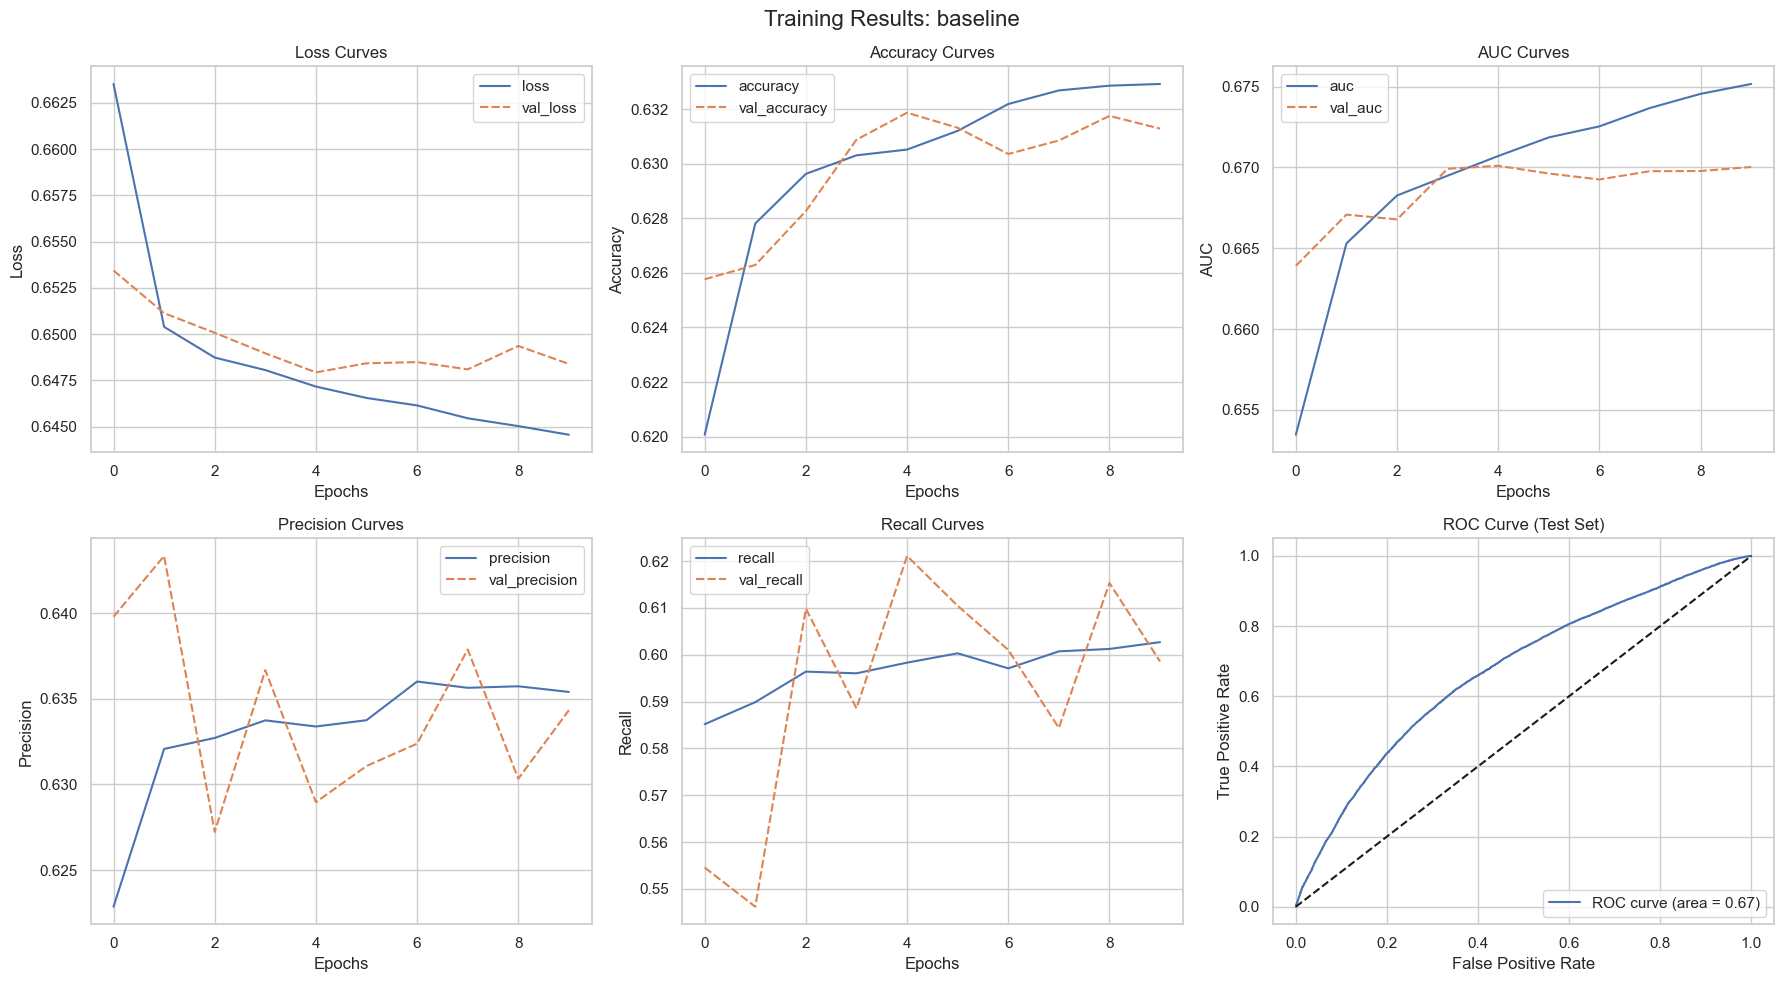


Test Metrics:
Loss: 0.6461
Accuracy: 0.6332
AUC: 0.6731
Precision: 0.6297
Recall: 0.6250
F1-Score: 0.6273

Confusion Matrix:
[[11161  6247]
 [ 6372 10621]]
✅ baseline -> acc=0.633, auc=0.673, f1=0.627


Model: "functional_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_40 (InputLayer)     │ (None, 27)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_142 (Dense)               │ (None, 128)            │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_76 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_143 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_77 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_144 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_78 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_145 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,953 (54.50 KB)

 Trainable params: 13,953 (54.50 KB)

 Non-trainable params: 0 (0.00 B)

Training History Summary:
        accuracy        auc       loss  precision     recall  val_accuracy  \
count  15.000000  15.000000  15.000000  15.000000  15.000000     15.000000   
mean    0.627228   0.661511   0.653704   0.630619   0.592245      0.629606   
std     0.005880   0.008375   0.007294   0.006278   0.007369      0.001823   
min     0.607548   0.634411   0.649555   0.609475   0.572037      0.625302   
25%     0.627335   0.661274   0.650632   0.629872   0.591546      0.629197   
50%     0.629332   0.664186   0.651490   0.633019   0.593211      0.629720   
75%     0.630051   0.665928   0.653080   0.633958   0.596363      0.630534   
max     0.630802   0.667888   0.679007   0.634623   0.600777      0.632453   

         val_auc   val_loss  val_precision  val_recall  
count  15.000000  15.000000      15.000000   15.000000  
mean    0.667925   0.649547       0.629689    0.608114  
std     0.002270   0.001439       0.006424    0.019508  
min     0.661531   0.648218       0.616078 

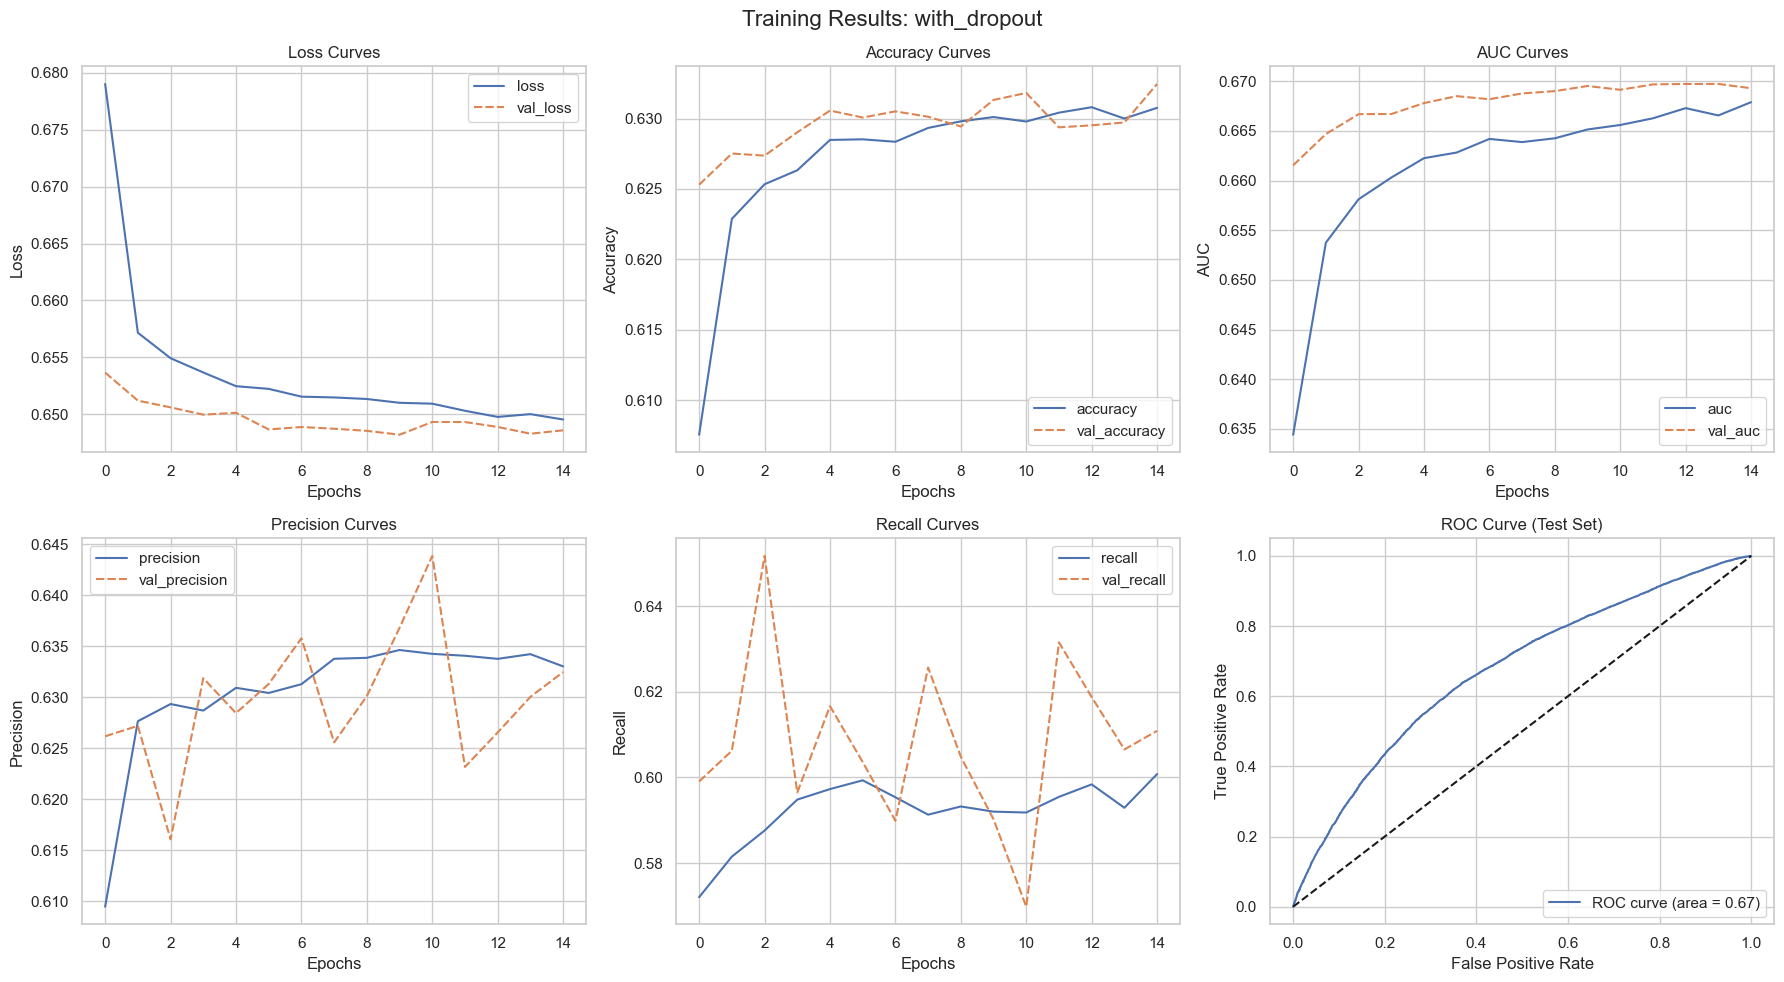


Test Metrics:
Loss: 0.6463
Accuracy: 0.6333
AUC: 0.6726
Precision: 0.6385
Recall: 0.5940
F1-Score: 0.6155

Confusion Matrix:
[[11693  5715]
 [ 6899 10094]]
✅ with_dropout -> acc=0.633, auc=0.673, f1=0.615


Model: "functional_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_41 (InputLayer)     │ (None, 27)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_146 (Dense)               │ (None, 128)            │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_61          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_79 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_147 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_62          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_80 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_148 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_63          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_81 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_149 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,849 (58.00 KB)

 Trainable params: 14,401 (56.25 KB)

 Non-trainable params: 448 (1.75 KB)

Training History Summary:
        accuracy        auc       loss  precision     recall  val_accuracy  \
count  15.000000  15.000000  15.000000  15.000000  15.000000     15.000000   
mean    0.625142   0.659526   0.653987   0.630343   0.583410      0.628228   
std     0.008103   0.010999   0.007247   0.009986   0.004464      0.002406   
min     0.596822   0.621743   0.650315   0.595380   0.573614      0.622191   
25%     0.626301   0.660392   0.650796   0.631271   0.580997      0.628572   
50%     0.627357   0.662597   0.651940   0.633824   0.582983      0.628906   
75%     0.628889   0.664656   0.653241   0.634306   0.585569      0.629706   
max     0.629201   0.665968   0.679320   0.634983   0.591672      0.630011   

         val_auc   val_loss  val_precision  val_recall  
count  15.000000  15.000000      15.000000   15.000000  
mean    0.665589   0.654449       0.623649    0.624317  
std     0.004227   0.002330       0.004680    0.019573  
min     0.653960   0.651798       0.614582 

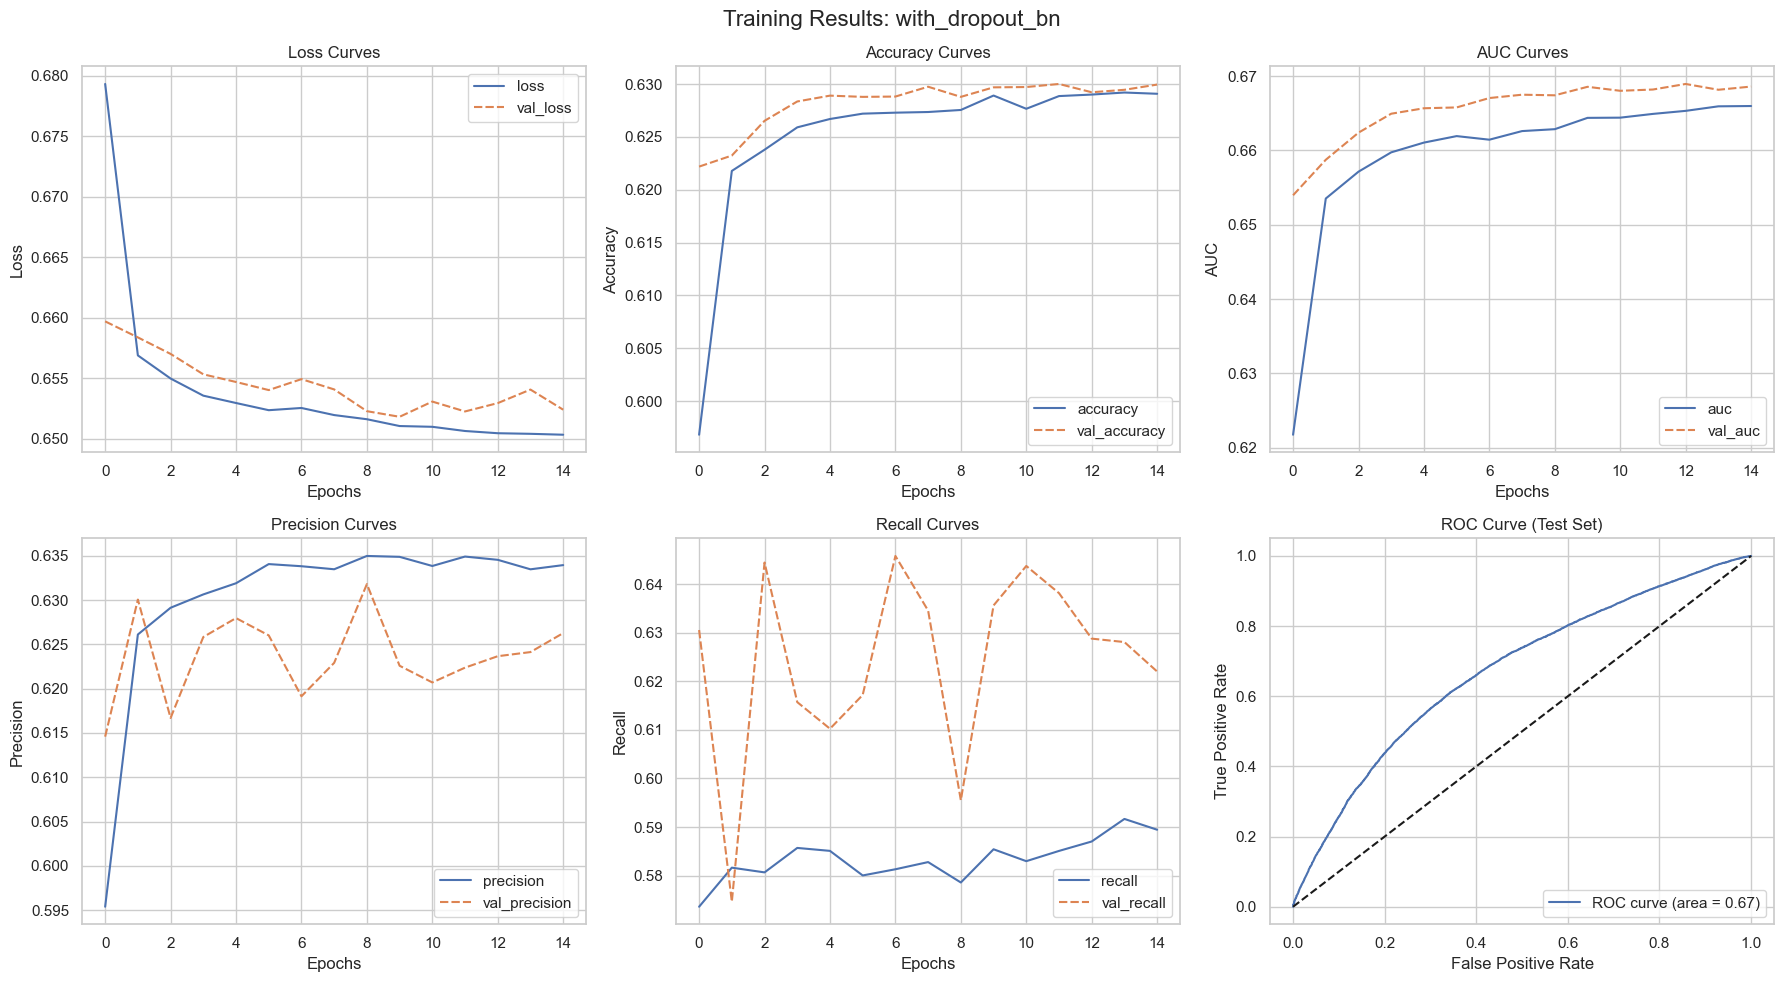


Test Metrics:
Loss: 0.6501
Accuracy: 0.6314
AUC: 0.6723
Precision: 0.6235
Recall: 0.6405
F1-Score: 0.6319

Confusion Matrix:
[[10837  6571]
 [ 6109 10884]]
✅ with_dropout_bn -> acc=0.631, auc=0.672, f1=0.632


Model: "functional_42"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_42 (InputLayer)     │ (None, 27)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_150 (Dense)               │ (None, 128)            │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_64          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_82 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_151 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_65          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_83 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_152 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_66          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_84 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_153 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,849 (58.00 KB)

 Trainable params: 14,401 (56.25 KB)

 Non-trainable params: 448 (1.75 KB)

Training History Summary:
        accuracy        auc       loss  precision     recall  val_accuracy  \
count  14.000000  14.000000  14.000000  14.000000  14.000000     14.000000   
mean    0.624641   0.659016   0.654369   0.629396   0.584178      0.628015   
std     0.007991   0.011462   0.007842   0.009359   0.006912      0.003228   
min     0.598118   0.621189   0.650556   0.597687   0.570259      0.619837   
25%     0.625156   0.659663   0.651209   0.631344   0.578318      0.628136   
50%     0.626936   0.663248   0.651633   0.632042   0.584951      0.629182   
75%     0.627936   0.664452   0.653495   0.632736   0.589342      0.629989   
max     0.630310   0.665396   0.680836   0.634892   0.592050      0.630912   

         val_auc   val_loss  val_precision  val_recall  
count  14.000000  14.000000      14.000000   14.000000  
mean    0.665861   0.654483       0.627690    0.608042  
std     0.003945   0.003234       0.007285    0.024736  
min     0.657663   0.649848       0.608565 

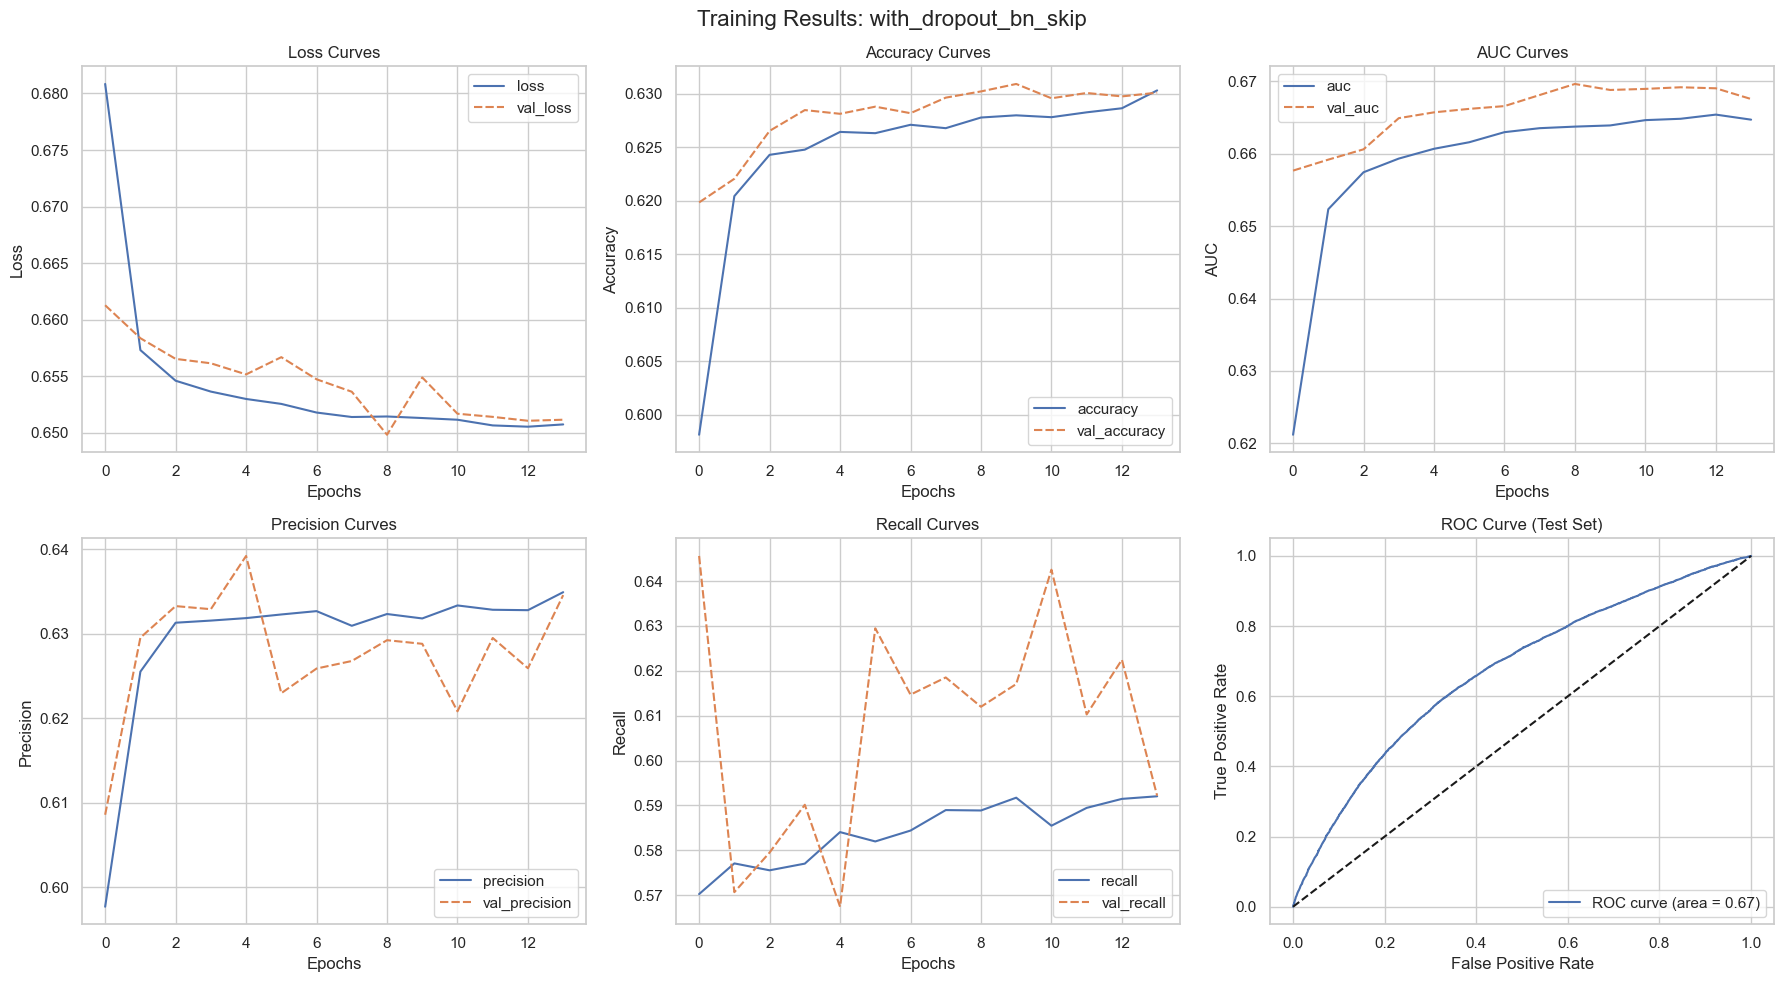


Test Metrics:
Loss: 0.6487
Accuracy: 0.6322
AUC: 0.6714
Precision: 0.6309
Recall: 0.6159
F1-Score: 0.6233

Confusion Matrix:
[[11284  6124]
 [ 6527 10466]]
✅ with_dropout_bn_skip -> acc=0.632, auc=0.671, f1=0.623


Model: "functional_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_43 (InputLayer)     │ (None, 27)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_154 (Dense)               │ (None, 128)            │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_67          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_85 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_155 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_68          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_86 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_156 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_69          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_87 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_157 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_158 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,361 (60.00 KB)

 Trainable params: 14,913 (58.25 KB)

 Non-trainable params: 448 (1.75 KB)

Training History Summary:
        accuracy        auc       loss  precision     recall  val_accuracy  \
count  30.000000  30.000000  30.000000  30.000000  30.000000     30.000000   
mean    0.627141   0.663624   0.651302   0.630400   0.592705      0.627729   
std     0.005523   0.007962   0.004430   0.006130   0.008506      0.001818   
min     0.600460   0.626530   0.648433   0.598844   0.570449      0.622627   
25%     0.626985   0.663593   0.649214   0.630633   0.587602      0.627104   
50%     0.628740   0.665708   0.650107   0.631588   0.595468      0.627845   
75%     0.629383   0.667484   0.651388   0.632364   0.599159      0.629037   
max     0.630721   0.668483   0.672140   0.633872   0.602492      0.630098   

         val_auc   val_loss  val_precision  val_recall  
count  30.000000  30.000000      30.000000   30.000000  
mean    0.666339   0.654770       0.619868    0.638453  
std     0.002599   0.001927       0.006936    0.028892  
min     0.657447   0.651390       0.609786 

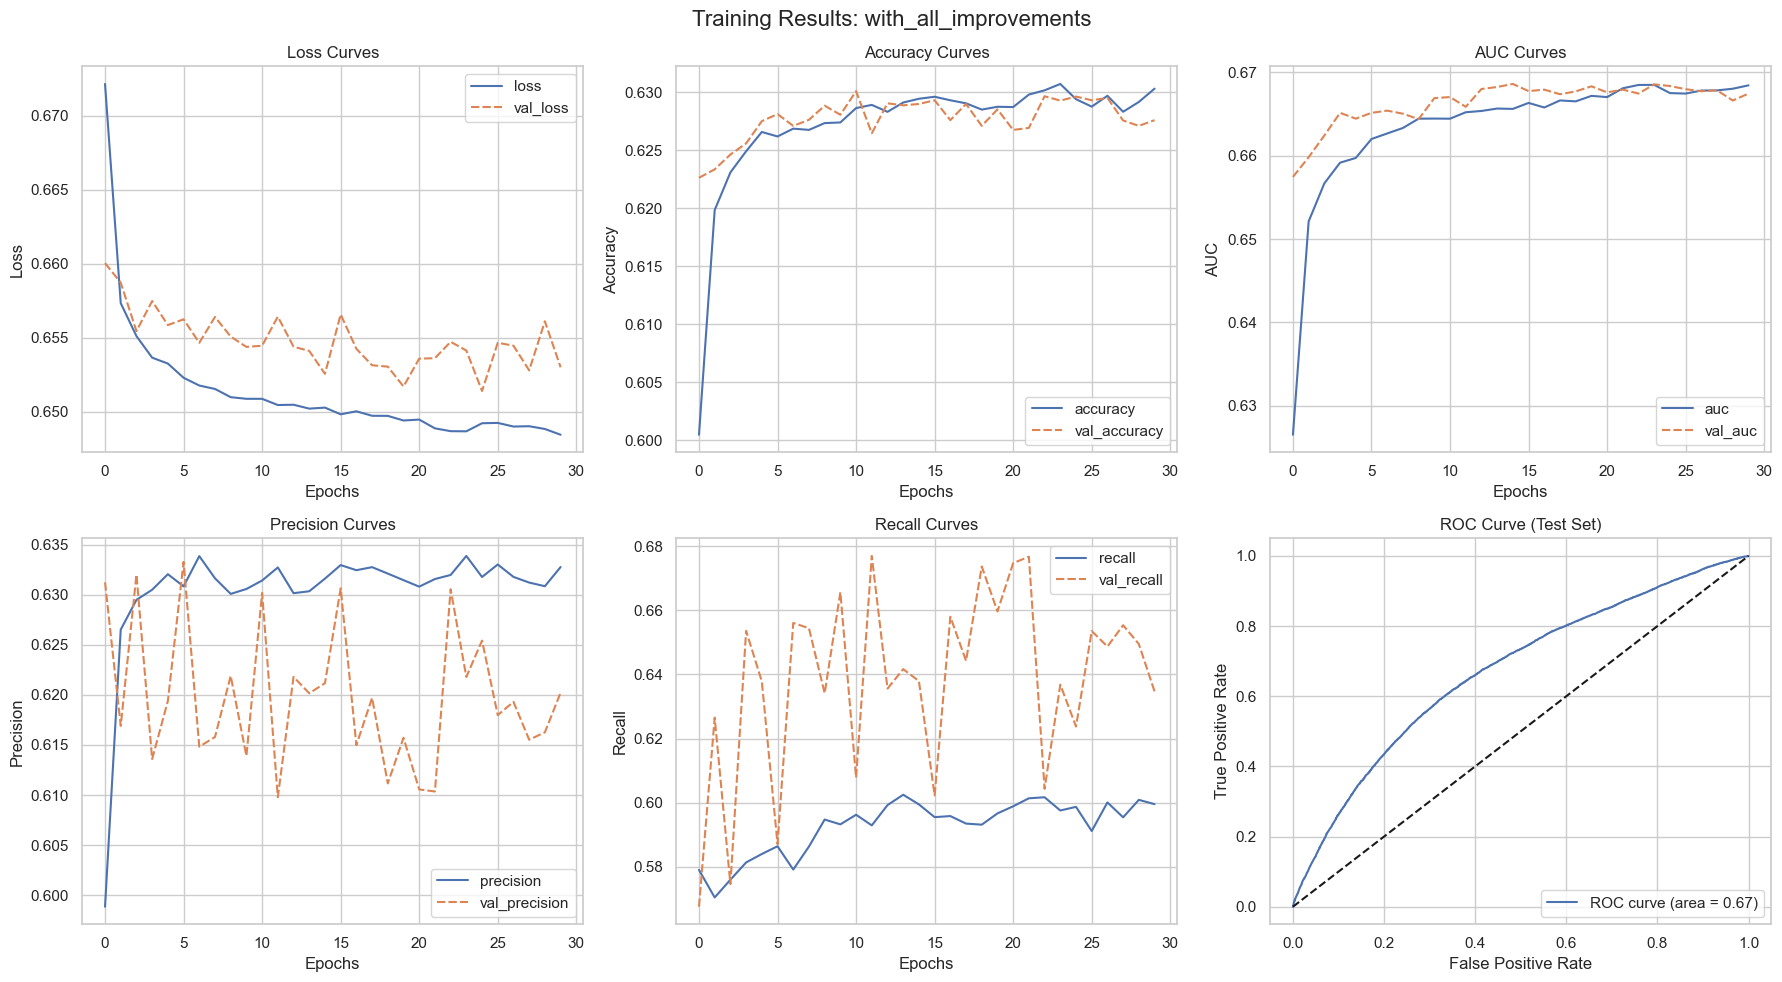


Test Metrics:
Loss: 0.6499
Accuracy: 0.6325
AUC: 0.6717
Precision: 0.6280
Recall: 0.6278
F1-Score: 0.6279

Confusion Matrix:
[[11089  6319]
 [ 6325 10668]]
✅ with_all_improvements -> acc=0.632, auc=0.672, f1=0.628


(<Functional name=functional_43, built=True>,
 {'loss': 0.6498792171478271,
  'accuracy': 0.6324525475502014,
  'auc': 0.6717057824134827,
  'precision': 0.6280096769332886,
  'recall': 0.6277878880500793,
  'f1': 0.6278987639788111})

In [160]:
# Baseline
config["model"].update({
    "dropout_rate": 0, 
    "batch_norm": False, 
    "skip_connection": False, 
    "bottleneck": False
})
config["experiment"]["name"] = "baseline"
config["experiment"]["description"] = "Baseline without improvements"
baseline_model, baseline_metrics = run_experiment(config, class_weight=class_weight_dict)

# Dropout
config["model"].update({
    "dropout_rate": 0.3
})
config["experiment"]["name"] = "with_dropout"
config["experiment"]["description"] = "Added dropout for regularization"
run_experiment(config, class_weight=class_weight_dict)

# BN
config["model"].update({
    "batch_norm": True
})
config["experiment"]["name"] = "with_dropout_bn"
config["experiment"]["description"] = "Added BN to stabilize training"
run_experiment(config, class_weight=class_weight_dict)

# Skip
config["model"].update({
    "skip_connection": True
})
config["experiment"]["name"] = "with_dropout_bn_skip"
config["experiment"]["description"] = "Added skip connections for gradient flow"
run_experiment(config, class_weight=class_weight_dict)

# Full improvements
config["model"].update({
    "bottleneck": True
})
config["experiment"]["name"] = "with_all_improvements"
config["experiment"]["description"] = "Full improvements including bottleneck"
run_experiment(config, class_weight=class_weight_dict)

After conducting experiments, we observed that batch normalization and dropout have the most positive impact on the validation dataset performance.


## Hyperparameter search (grid/random) / sweep

This block explores different model configurations to find the most effective MLP setup.

Instead of manually testing each parameter, we randomly generate several configurations using `ParameterSampler`.  
This approach allows us to search a wide range of architectures and training settings more efficiently than a full grid search.

**What parameters are being varied:**
- `dropout_rate` – how much dropout is used for regularization  
- `batch_norm` – enable/disable Batch Normalization  
- `bottleneck` – whether to add a dense bottleneck layer  
- `skip_connection` – enable residual/skip connections  
- `hidden_layers` – different MLP depths and widths  
- `learning_rate`, `batch_size`, `epochs` – training hyperparameters

For each randomly generated configuration:
1. Parameters are added to `config`  
2. Experiment name is assigned (`random_i`)  
3. `run_experiment()` trains, evaluates, visualizes and logs results

Model: "functional_44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_44 (InputLayer)     │ (None, 27)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_159 (Dense)               │ (None, 256)            │         7,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_88 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_160 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_89 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_161 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_90 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_162 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,385 (189.00 KB)

 Trainable params: 48,385 (189.00 KB)

 Non-trainable params: 0 (0.00 B)

Training History Summary:
        accuracy        auc       loss  precision     recall  val_accuracy  \
count  21.000000  21.000000  21.000000  21.000000  21.000000     21.000000   
mean    0.627469   0.662833   0.653580   0.630463   0.594001      0.629918   
std     0.006360   0.009142   0.010846   0.006833   0.008578      0.001793   
min     0.601942   0.628254   0.648706   0.603468   0.566186      0.624081   
25%     0.628005   0.663083   0.649705   0.629587   0.592782      0.629429   
50%     0.629450   0.666094   0.650253   0.632234   0.595405      0.630331   
75%     0.630484   0.667382   0.652273   0.634704   0.599806      0.630941   
max     0.631325   0.669118   0.699547   0.636081   0.602164      0.632743   

         val_auc   val_loss  val_precision  val_recall  
count  21.000000  21.000000      21.000000   21.000000  
mean    0.668169   0.649422       0.630472    0.606403  
std     0.002824   0.001572       0.004981    0.016357  
min     0.658352   0.648123       0.622127 

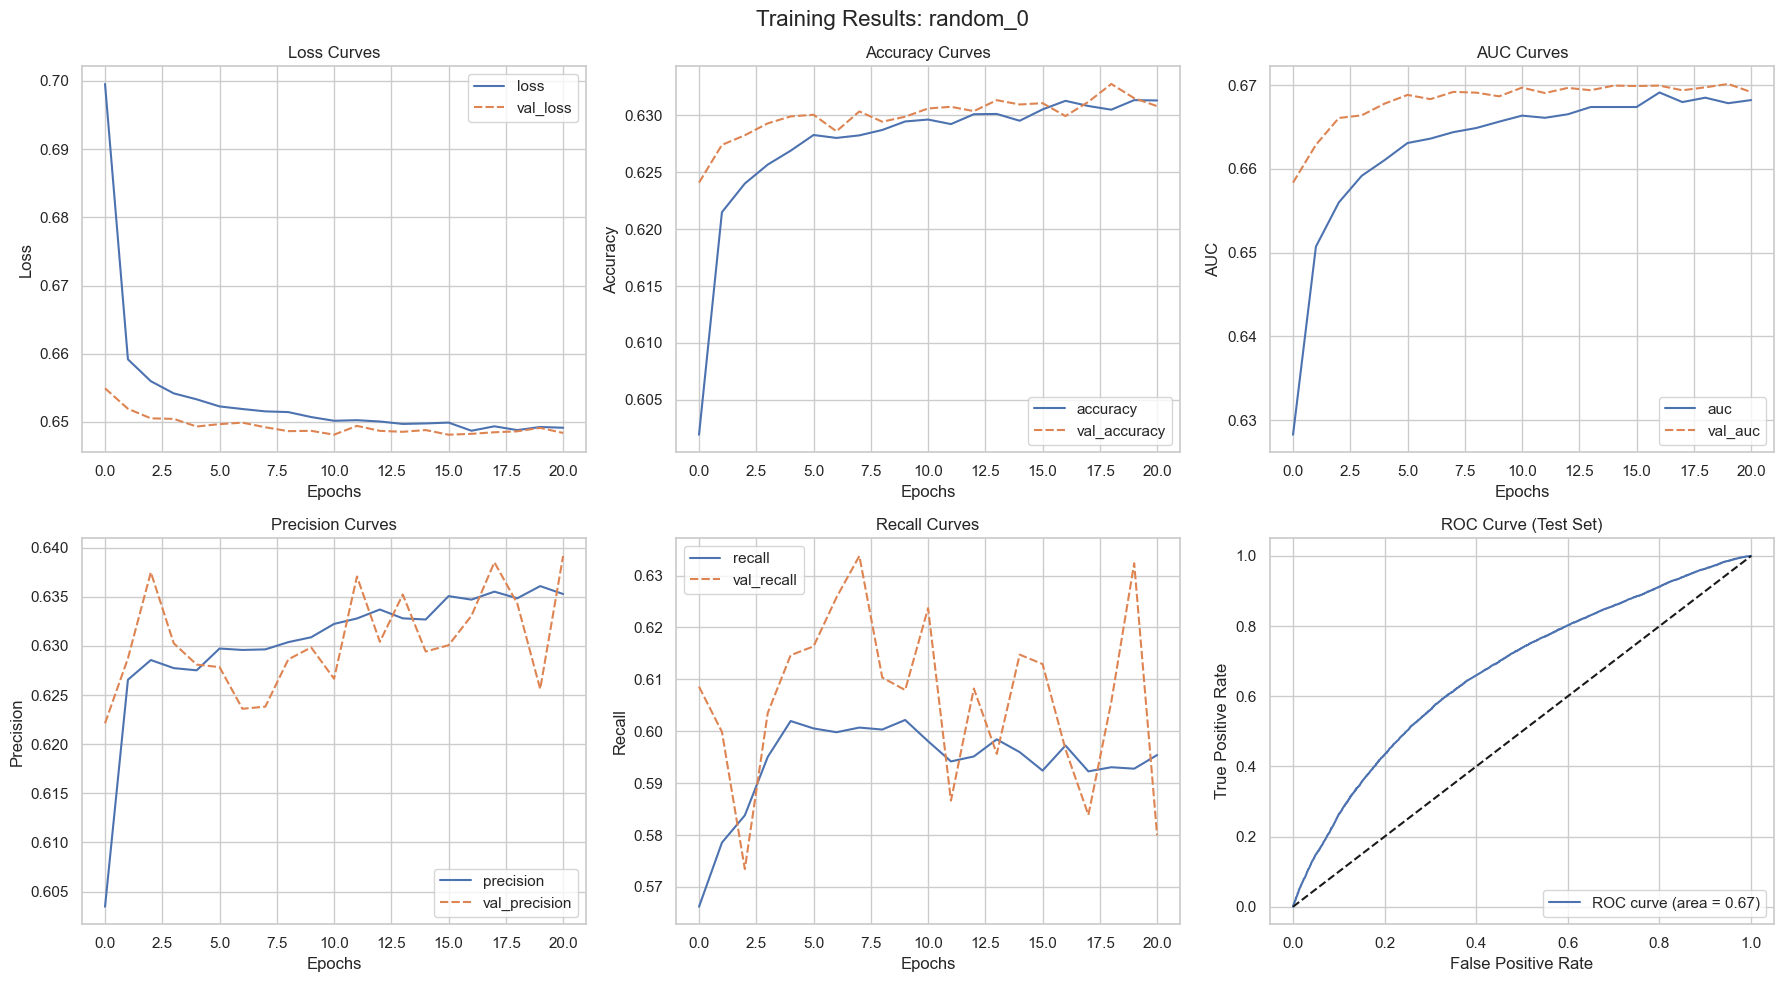


Test Metrics:
Loss: 0.6467
Accuracy: 0.6327
AUC: 0.6720
Precision: 0.6310
Recall: 0.6177
F1-Score: 0.6242

Confusion Matrix:
[[11269  6139]
 [ 6497 10496]]
✅ random_0 -> acc=0.633, auc=0.672, f1=0.624


Model: "functional_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_45 (InputLayer)     │ (None, 27)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_163 (Dense)               │ (None, 64)             │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_70          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_91 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_164 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_71          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_92 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_165 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,289 (16.75 KB)

 Trainable params: 4,097 (16.00 KB)

 Non-trainable params: 192 (768.00 B)

Training History Summary:
        accuracy        auc       loss  precision     recall  val_accuracy  \
count  15.000000  15.000000  15.000000  15.000000  15.000000     15.000000   
mean    0.624168   0.660116   0.653916   0.628141   0.586824      0.624914   
std     0.009262   0.012981   0.009414   0.011624   0.004047      0.004868   
min     0.593489   0.617410   0.648554   0.589031   0.578998      0.613325   
25%     0.624221   0.659797   0.649599   0.629474   0.584194      0.622002   
50%     0.627021   0.664563   0.650718   0.631929   0.586577      0.627685   
75%     0.628917   0.666822   0.653442   0.633818   0.589528      0.628528   
max     0.629892   0.668609   0.686061   0.635216   0.593387      0.629052   

         val_auc   val_loss  val_precision  val_recall  
count  15.000000  15.000000      15.000000   15.000000  
mean    0.660539   0.659526       0.631339    0.578857  
std     0.005163   0.004665       0.003586    0.031116  
min     0.646487   0.654771       0.621600 

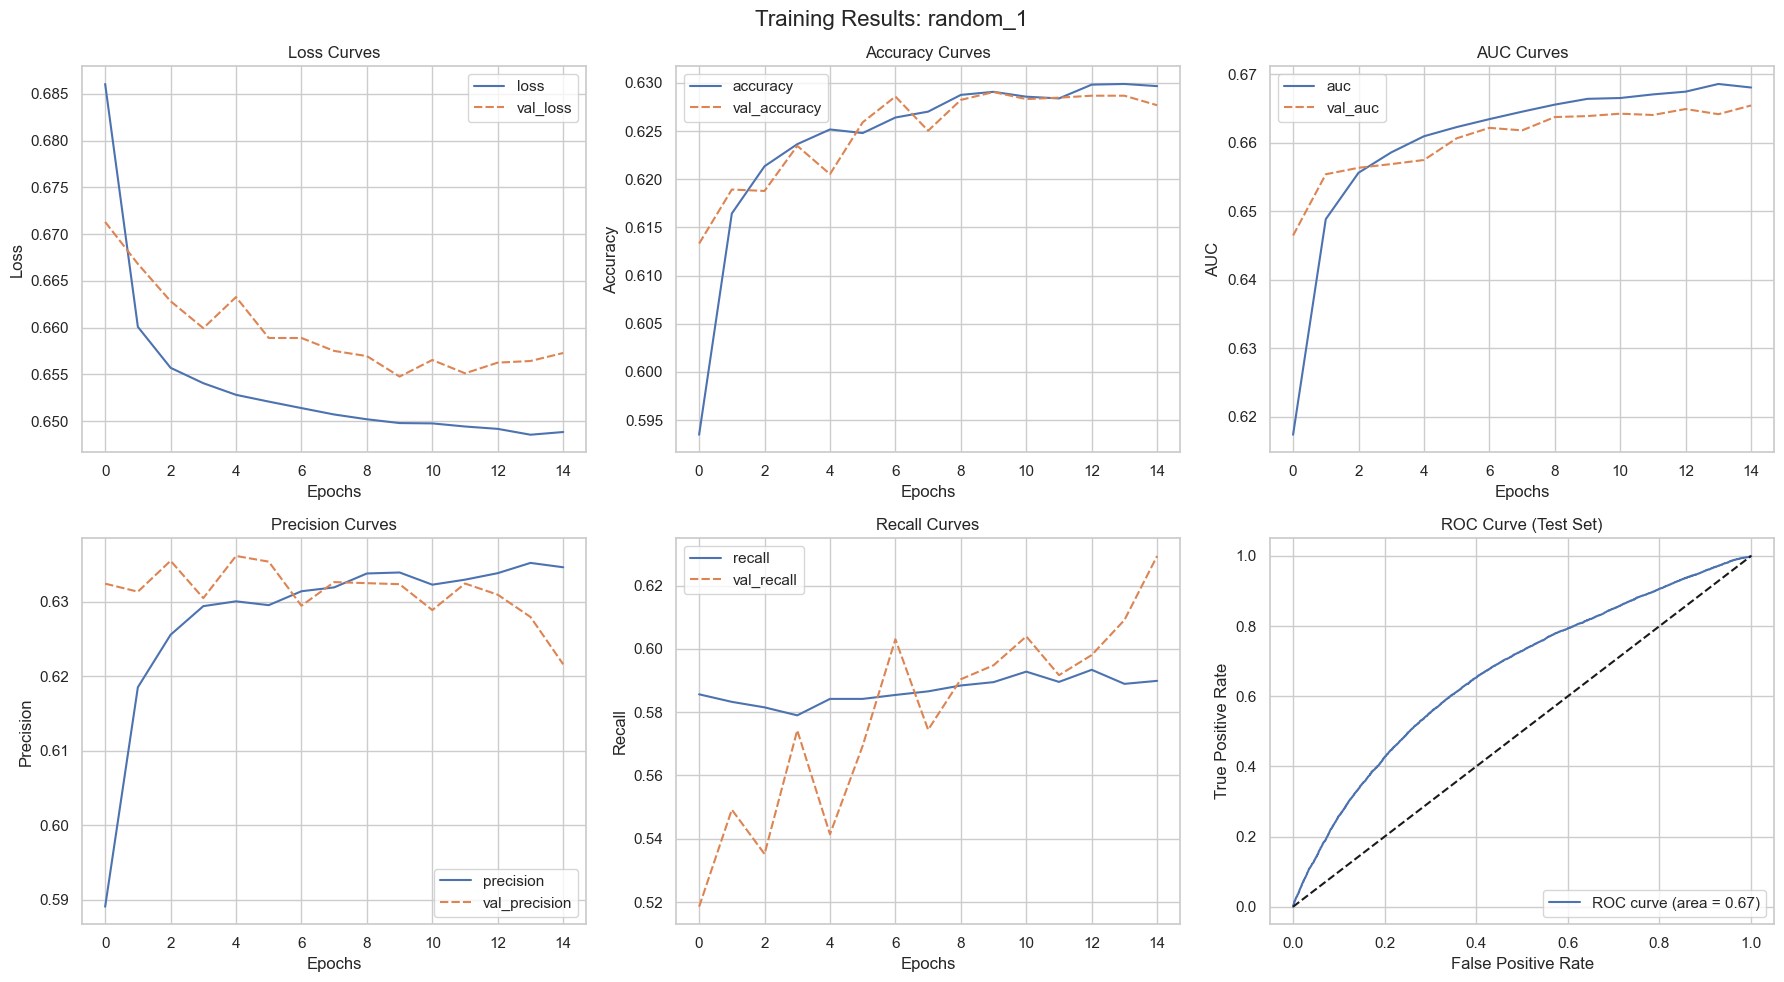


Test Metrics:
Loss: 0.6544
Accuracy: 0.6288
AUC: 0.6653
Precision: 0.6313
Recall: 0.5974
F1-Score: 0.6139

Confusion Matrix:
[[11479  5929]
 [ 6841 10152]]
✅ random_1 -> acc=0.629, auc=0.665, f1=0.614


Model: "functional_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_46 (InputLayer)     │ (None, 27)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_166 (Dense)               │ (None, 64)             │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_72          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_93 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_167 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_73          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_94 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_168 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_169 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,801 (18.75 KB)

 Trainable params: 4,609 (18.00 KB)

 Non-trainable params: 192 (768.00 B)

Training History Summary:
        accuracy        auc       loss  precision     recall  val_accuracy  \
count  50.000000  50.000000  50.000000  50.000000  50.000000     50.000000   
mean    0.613367   0.642617   0.664051   0.615036   0.586222      0.619417   
std     0.022657   0.027513   0.023081   0.025392   0.015832      0.015250   
min     0.515987   0.523593   0.653481   0.507550   0.550499      0.547310   
25%     0.616073   0.643757   0.654835   0.617593   0.584957      0.622962   
50%     0.621745   0.652140   0.657096   0.624024   0.587662      0.623906   
75%     0.624381   0.656859   0.661631   0.627779   0.588627      0.624698   
max     0.625775   0.659472   0.799637   0.629887   0.676881      0.626406   

         val_auc   val_loss  val_precision  val_recall  
count  50.000000  50.000000      50.000000   50.000000  
mean    0.655057   0.659774       0.625081    0.573972  
std     0.016783   0.010714       0.010418    0.071339  
min     0.569799   0.652974       0.574177 

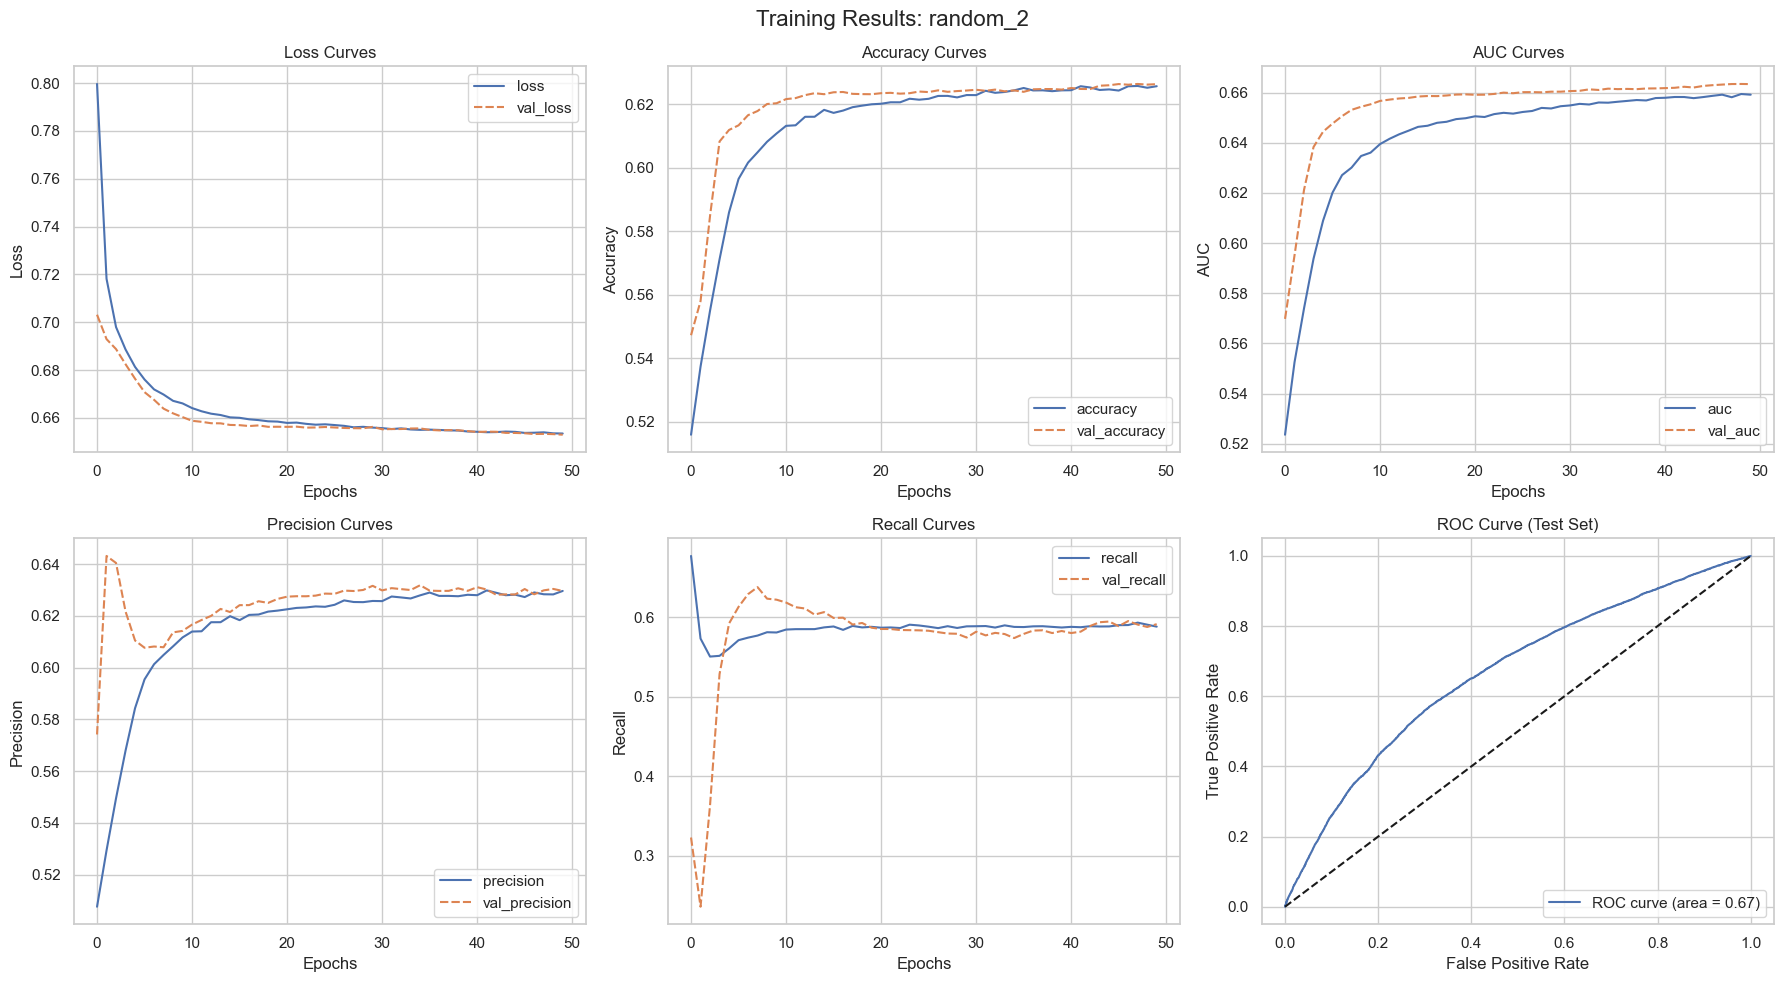


Test Metrics:
Loss: 0.6516
Accuracy: 0.6292
AUC: 0.6661
Precision: 0.6319
Recall: 0.5973
F1-Score: 0.6141

Confusion Matrix:
[[11495  5913]
 [ 6843 10150]]
✅ random_2 -> acc=0.629, auc=0.666, f1=0.614


Model: "functional_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_47 (InputLayer)     │ (None, 27)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_170 (Dense)               │ (None, 64)             │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_74          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_95 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_171 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_75          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_96 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_172 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_173 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,801 (18.75 KB)

 Trainable params: 4,609 (18.00 KB)

 Non-trainable params: 192 (768.00 B)

Training History Summary:
        accuracy        auc       loss  precision     recall  val_accuracy  \
count  36.000000  36.000000  36.000000  36.000000  36.000000     36.000000   
mean    0.627488   0.665093   0.650484   0.631966   0.588956      0.629106   
std     0.008342   0.011140   0.006739   0.009564   0.006916      0.004257   
min     0.585286   0.610610   0.646627   0.581553   0.572012      0.615127   
25%     0.627385   0.664546   0.647321   0.632740   0.585881      0.628841   
50%     0.630347   0.668738   0.648351   0.634824   0.591729      0.630708   
75%     0.631031   0.670688   0.650615   0.635651   0.594200      0.631544   
max     0.632614   0.671992   0.684707   0.637461   0.596426      0.632482   

         val_auc   val_loss  val_precision  val_recall  
count  36.000000  36.000000      36.000000   36.000000  
mean    0.666638   0.650955       0.632044    0.596310  
std     0.005168   0.004067       0.003346    0.018398  
min     0.649507   0.647817       0.621809 

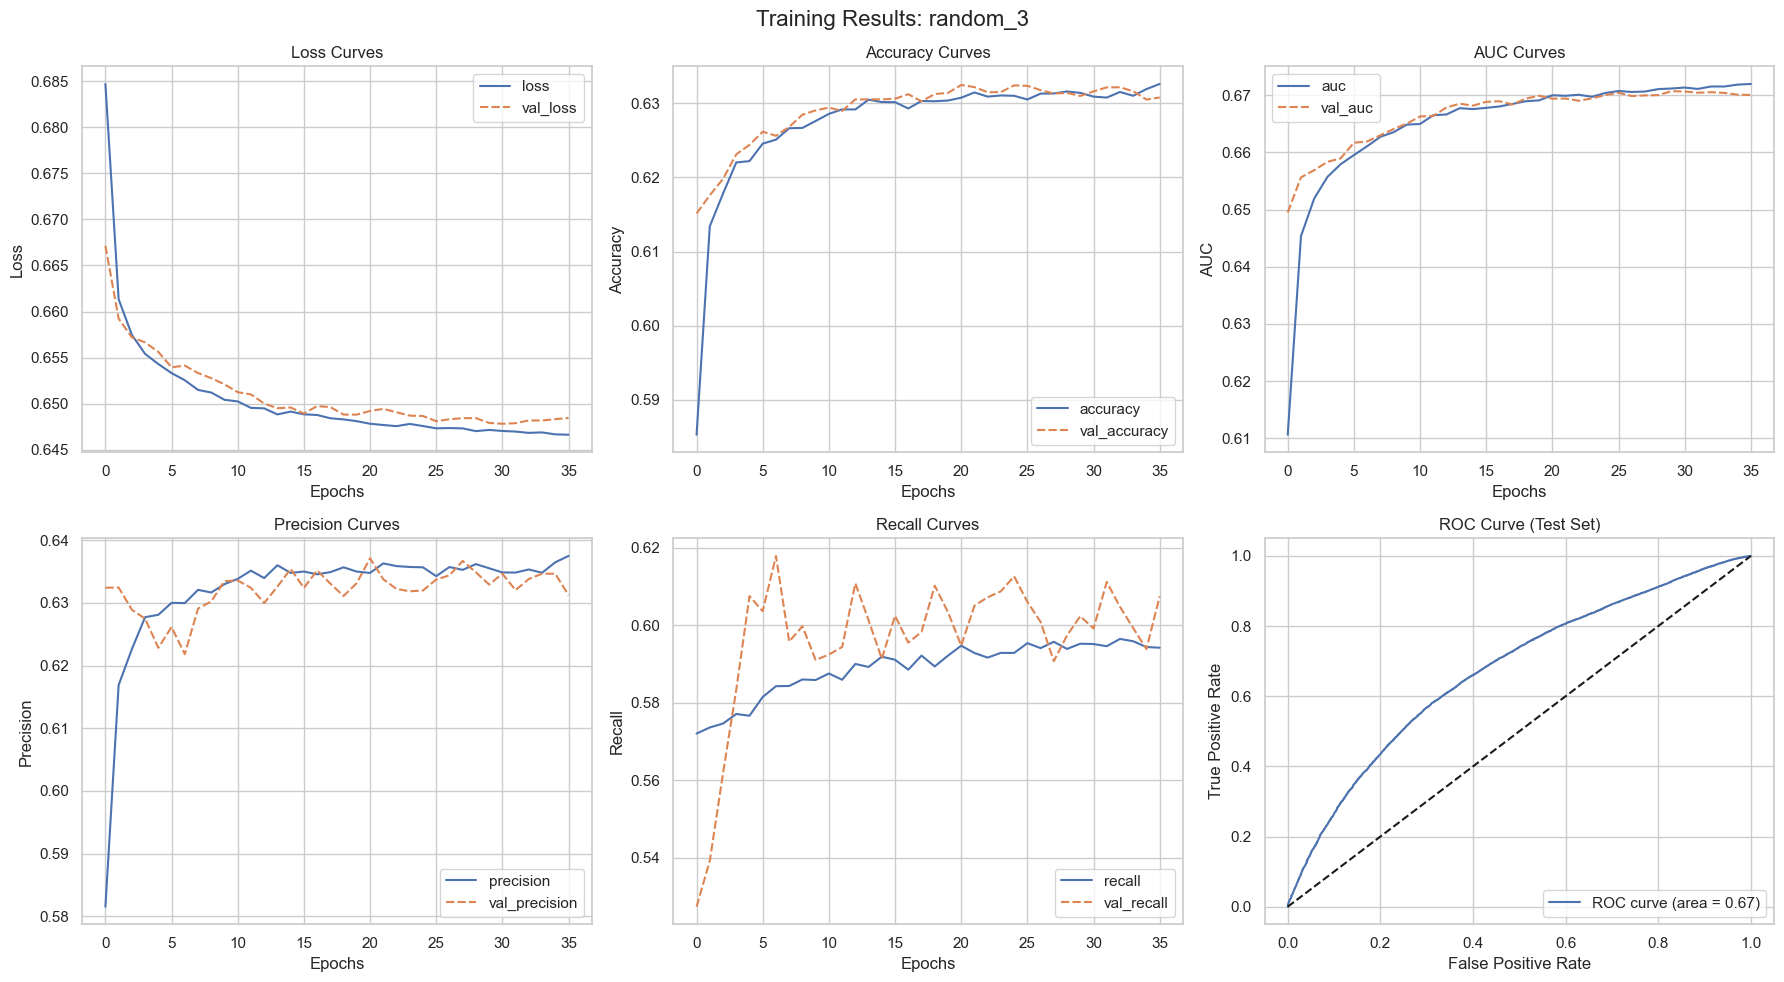


Test Metrics:
Loss: 0.6458
Accuracy: 0.6337
AUC: 0.6742
Precision: 0.6365
Recall: 0.6027
F1-Score: 0.6192

Confusion Matrix:
[[11559  5849]
 [ 6751 10242]]
✅ random_3 -> acc=0.634, auc=0.674, f1=0.619


Model: "functional_48"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_48 (InputLayer)     │ (None, 27)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_174 (Dense)               │ (None, 64)             │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_76          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_97 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_175 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_77          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_98 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_176 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_177 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,801 (18.75 KB)

 Trainable params: 4,609 (18.00 KB)

 Non-trainable params: 192 (768.00 B)

Training History Summary:
        accuracy        auc       loss  precision     recall  val_accuracy  \
count  20.000000  20.000000  20.000000  20.000000  20.000000     20.000000   
mean    0.626920   0.663999   0.651057   0.632158   0.585479      0.628342   
std     0.006253   0.008734   0.004898   0.007476   0.006335      0.002754   
min     0.603487   0.632463   0.647581   0.602134   0.569906      0.621755   
25%     0.626002   0.663590   0.648329   0.632233   0.582470      0.627431   
50%     0.628933   0.666888   0.649452   0.634439   0.587101      0.628964   
75%     0.630482   0.668996   0.651385   0.635329   0.590767      0.630156   
max     0.631057   0.670354   0.668948   0.636314   0.592252      0.631668   

         val_auc   val_loss  val_precision  val_recall  
count  20.000000  20.000000      20.000000   20.000000  
mean    0.666881   0.650710       0.628987    0.603825  
std     0.004752   0.003008       0.002912    0.016901  
min     0.654425   0.647888       0.623608 

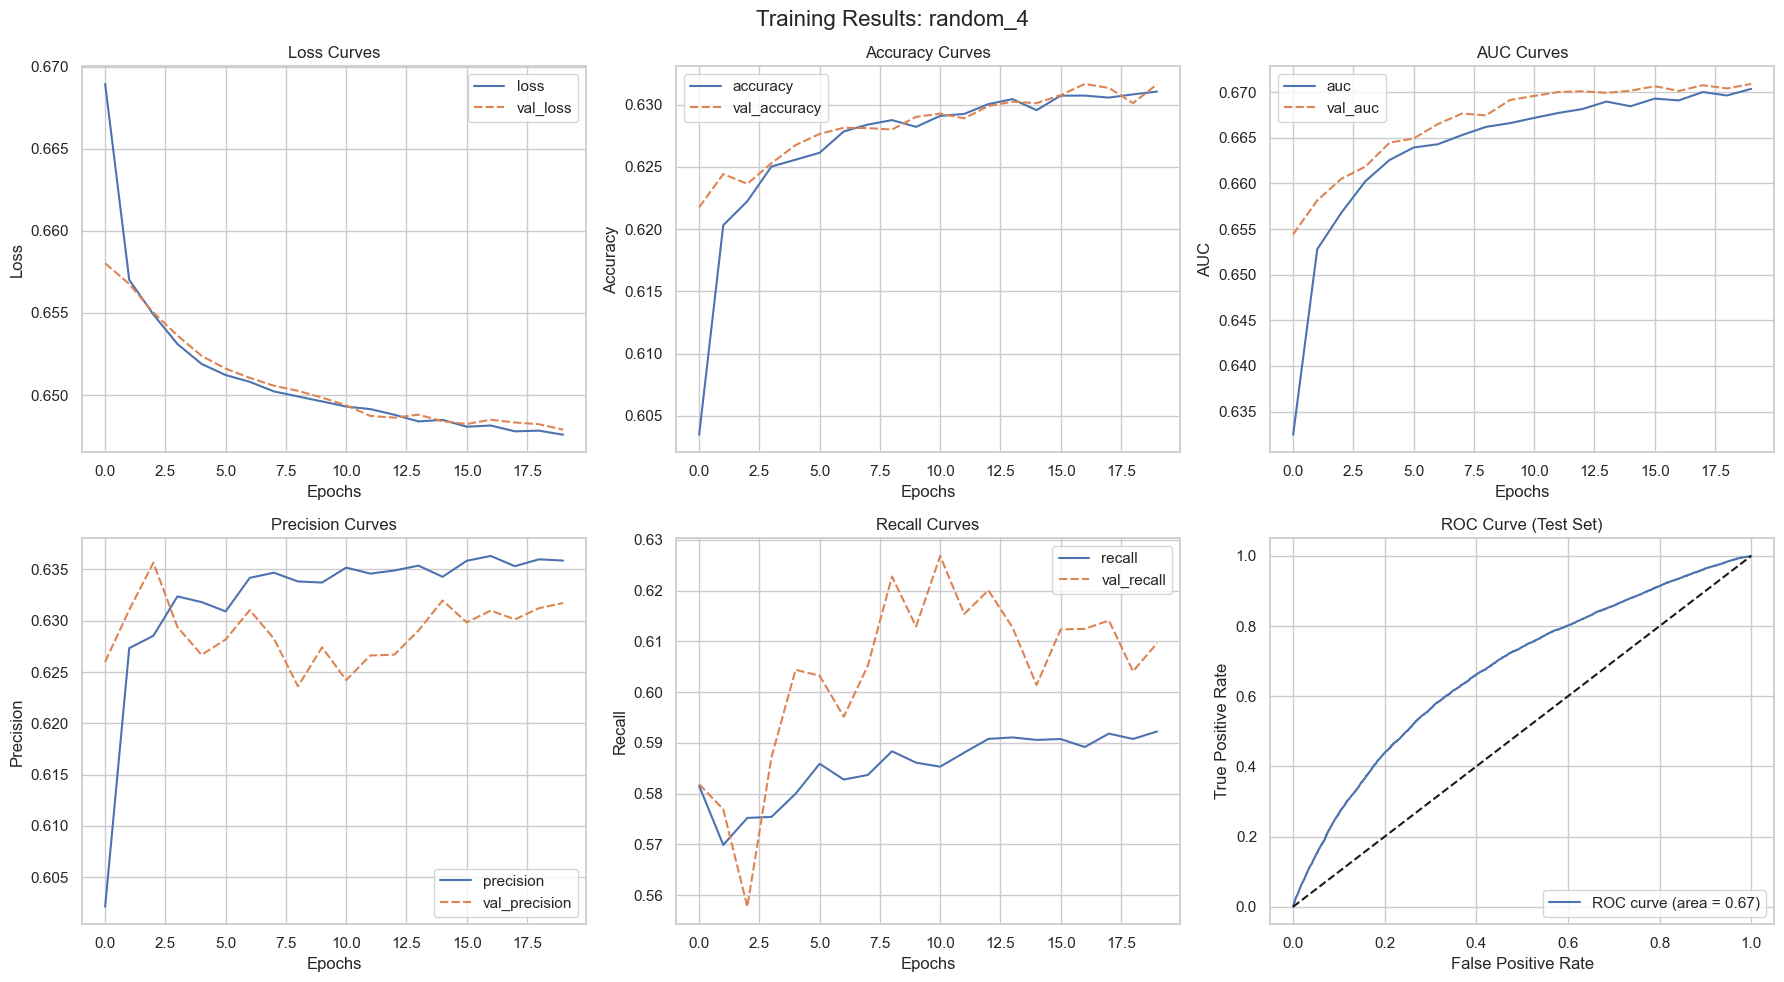


Test Metrics:
Loss: 0.6462
Accuracy: 0.6337
AUC: 0.6733
Precision: 0.6331
Recall: 0.6148
F1-Score: 0.6238

Confusion Matrix:
[[11352  6056]
 [ 6545 10448]]
✅ random_4 -> acc=0.634, auc=0.673, f1=0.624


In [161]:
from sklearn.model_selection import ParameterSampler

param_dist = {
    "dropout_rate": [0.1, 0.2, 0.3, 0.4, 0.5],
    "batch_norm": [True, False],
    "bottleneck": [True, False],
    "skip_connection": [True, False],
    "hidden_layers": [[128, 64, 32], [256, 128, 64], [64, 32]],
    "learning_rate": [0.001, 0.0005, 0.0001],
    "batch_size": [32, 64, 128],
    "epochs": [20, 30, 50]
}

random_params = list(ParameterSampler(param_dist, n_iter=5, random_state=42))

for i, params in enumerate(random_params):
    config["model"].update({
        "dropout_rate": params["dropout_rate"],
        "batch_norm": params["batch_norm"],
        "bottleneck": params["bottleneck"],
        "skip_connection": params["skip_connection"],
        "hidden_layers": params["hidden_layers"]
    })
    config["training"].update({
        "learning_rate": params["learning_rate"],
        "batch_size": params["batch_size"],
        "epochs": params["epochs"]
    })

    config["experiment"]["name"] = f"random_{i}"
    config["experiment"]["description"] = "Random search with ParameterSampler"

    run_experiment(config, class_weight=class_weight_dict)


## Results and evaluation metrics

This block evaluates the results of all experiments and selects the best model.
 - Loads the experiment logs and sorts them by F1 score to identify the top configurations.
 - Visualizes the top 10 experiments based on F1 to compare model performance 
 - Adds a heatmap for correlations between config parameters and metrics.
 - Retrains the best model to generate a confusion matrix for detailed error analysis
 - Compares train, validation, and test metrics with grouped barplots to detect potential overfitting.
 - Prints the best experiment and its key performance metrics.

Top 10 Experiments:
                  time                   name  accuracy       auc        f1  \
0  2025-11-01 22:47:31        with_dropout_bn  0.630272  0.670041  0.632027   
1  2025-11-01 22:00:51        with_dropout_bn  0.631406  0.672340  0.631909   
2  2025-11-02 09:19:06        with_dropout_bn  0.631028  0.671575  0.628371   
3  2025-11-01 22:02:01  with_all_improvements  0.632453  0.671706  0.627899   
4  2025-11-01 22:00:06               baseline  0.633179  0.673096  0.627329   
5  2025-11-02 08:58:53        with_dropout_bn  0.633703  0.672414  0.626405   
6  2025-11-02 09:07:29        with_dropout_bn  0.630796  0.670154  0.625814   
7  2025-11-01 22:03:09               random_0  0.632685  0.672023  0.624242   
8  2025-11-02 09:22:38        with_dropout_bn  0.630854  0.669136  0.624012   
9  2025-11-01 22:04:44               random_4  0.633703  0.673327  0.623817   

   dropout   skip     bn  bottleneck  
0      0.3  False   True       False  
1      0.3  False   True       F

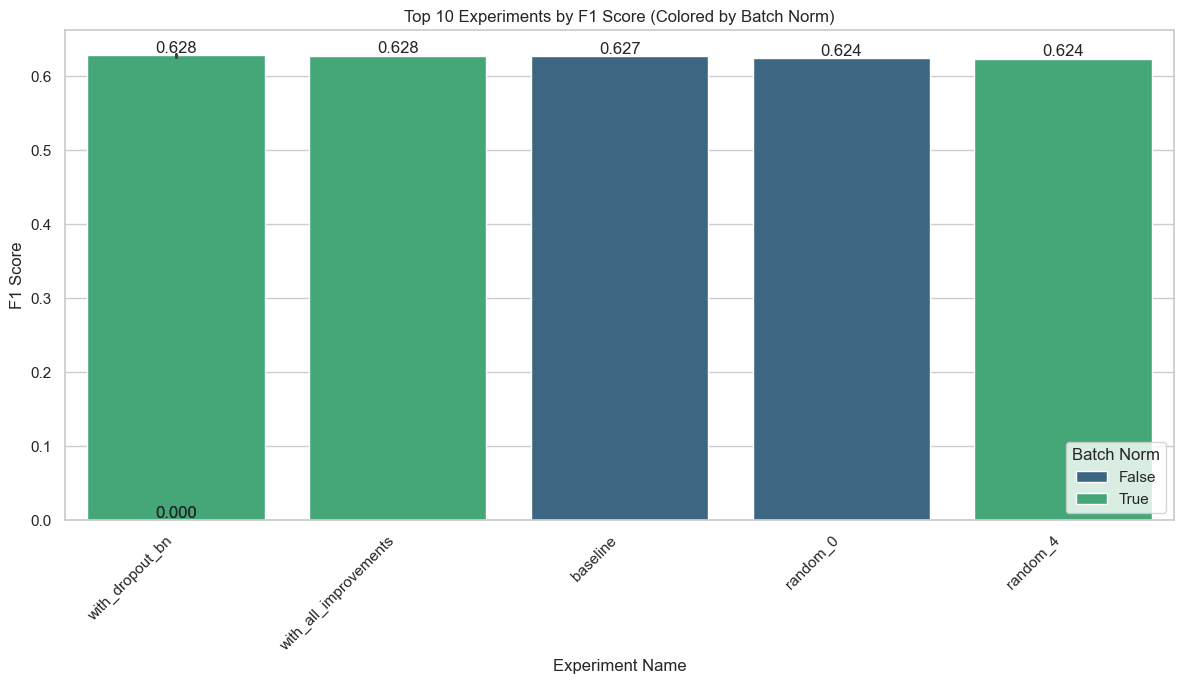

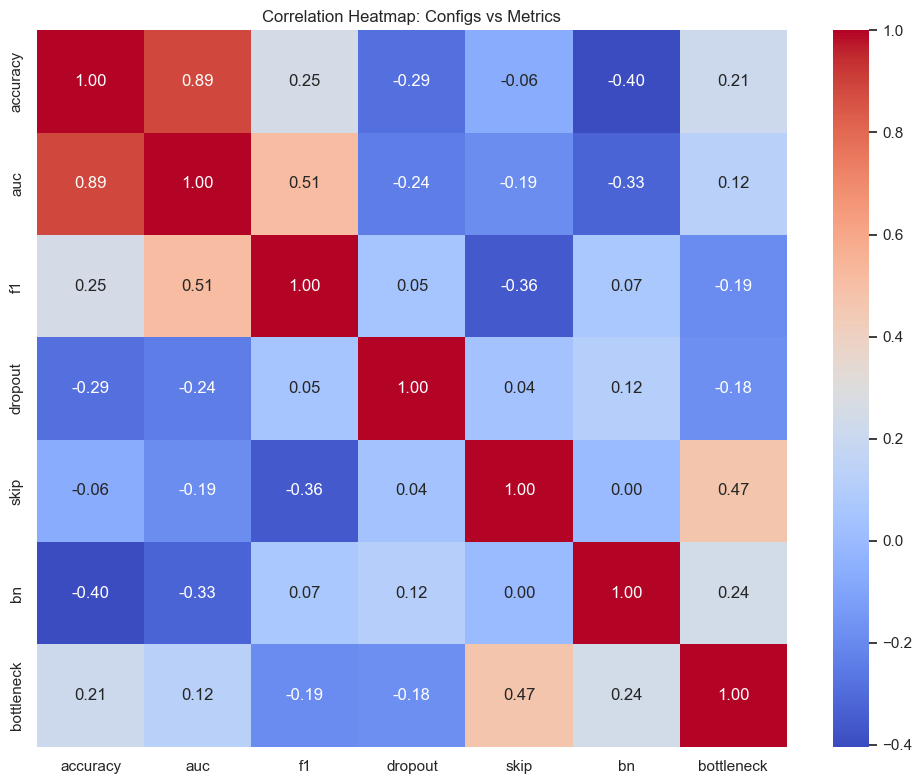

Best experiment: with_dropout_bn with F1=0.632


Model: "functional_57"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_57 (InputLayer)     │ (None, 27)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_210 (Dense)               │ (None, 128)            │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_102         │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_123 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_211 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_103         │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_124 (Dropout)           │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_212 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_104         │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_125 (Dropout)           │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_213 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,849 (58.00 KB)

 Trainable params: 14,401 (56.25 KB)

 Non-trainable params: 448 (1.75 KB)

Training History Summary:
        accuracy        auc       loss  precision     recall  val_accuracy  \
count  13.000000  13.000000  13.000000  13.000000  13.000000     13.000000   
mean    0.624021   0.658792   0.654832   0.630142   0.578923      0.626294   
std     0.009072   0.012719   0.009694   0.011718   0.002179      0.002794   
min     0.595072   0.619078   0.649611   0.592745   0.574913      0.620476   
25%     0.624554   0.659117   0.650787   0.630119   0.577195      0.623964   
50%     0.626734   0.663581   0.651555   0.633948   0.579566      0.626958   
75%     0.628291   0.664640   0.653709   0.635762   0.580701      0.628499   
max     0.629269   0.667224   0.686199   0.637075   0.581836      0.629836   

         val_auc   val_loss  val_precision  val_recall  
count  13.000000  13.000000      13.000000   13.000000  
mean    0.663804   0.657239       0.627752    0.598531  
std     0.002628   0.001536       0.003373    0.023748  
min     0.657791   0.655362       0.622280 

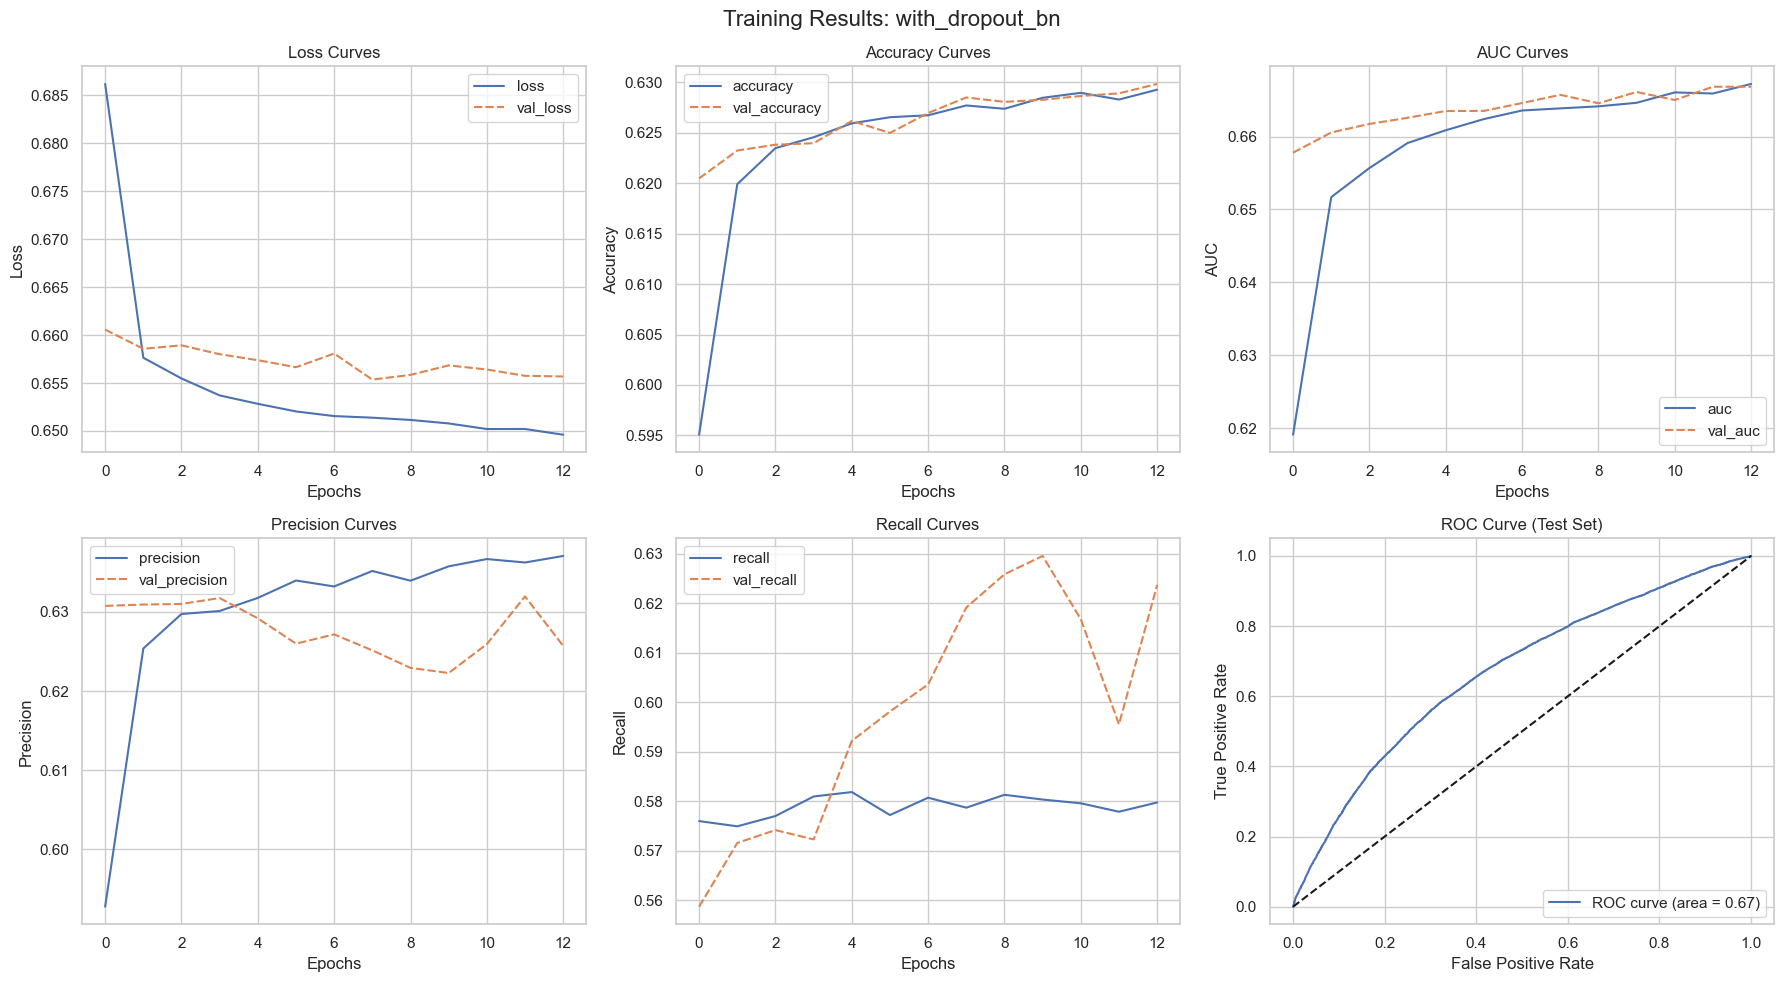


Test Metrics:
Loss: 0.6544
Accuracy: 0.6280
AUC: 0.6682
Precision: 0.6246
Recall: 0.6191
F1-Score: 0.6218

Confusion Matrix:
[[11085  6323]
 [ 6473 10520]]
✅ with_dropout_bn -> acc=0.628, auc=0.668, f1=0.622


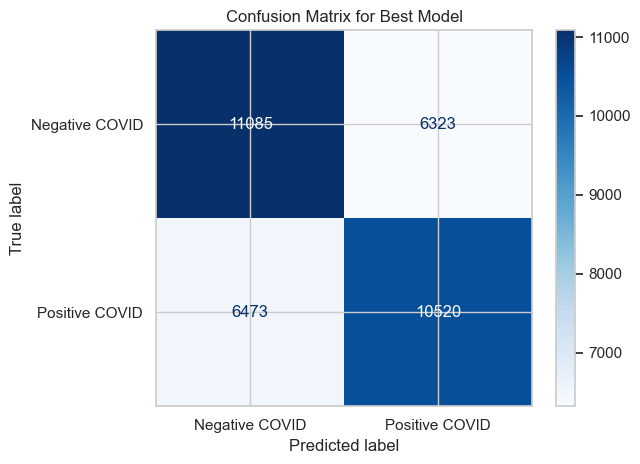

Overfitting check:
     Set      Loss  Accuracy
0  Train  0.654704  0.628659
1    Val  0.655362  0.628499
2   Test  0.654381  0.628034


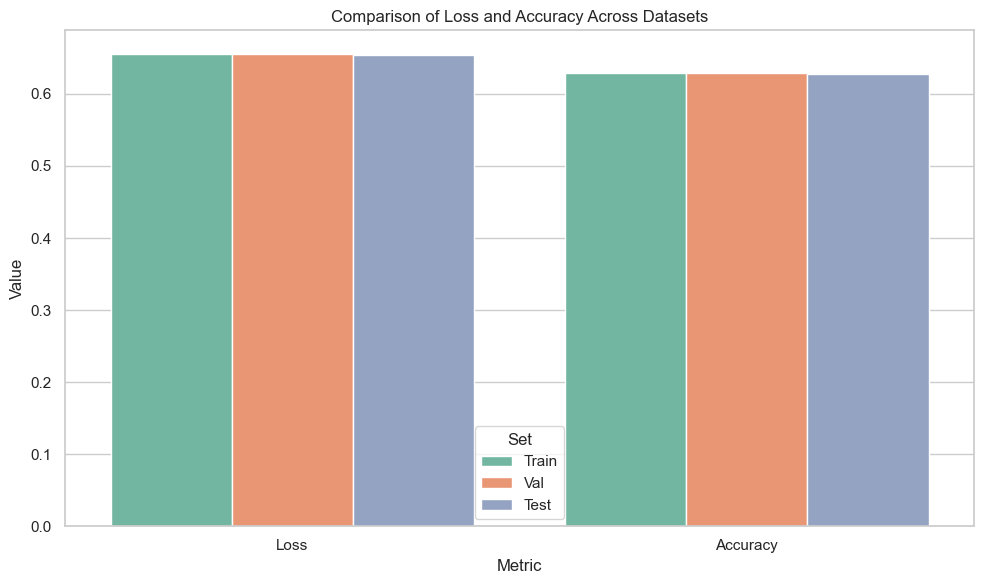

Best model metrics: {'loss': 0.6543810963630676, 'accuracy': 0.6280340552330017, 'auc': 0.6682448983192444, 'precision': 0.6245918273925781, 'recall': 0.6190784573554993, 'f1': 0.6218229105095165}


In [171]:
def run_experiment(config, class_weight=None):
    train_cfg = config["training"]
    model = build_and_compile_model(config)
    history = train_model(model, train_cfg, X_train, y_train, X_val, y_val, class_weight)
    history_df = analyze_history(history)
    y_pred_prob = visualize_results(history_df, config, model, X_test, y_test)
    metrics = evaluate_model(model, X_test, y_test, history, y_pred_prob)
    return log_and_return(model, metrics, config)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import json

with open("experiments_log.json", "r") as f:
    logs = json.load(f)

df_logs = pd.DataFrame([{
    "time": log["timestamp"],
    "name": log["experiment_name"],
    "accuracy": log["metrics"]["accuracy"],
    "auc": log["metrics"]["auc"],
    "f1": log["metrics"].get("f1", 0),
    "dropout": log["config"]["model"]["dropout_rate"],
    "skip": log["config"]["model"]["skip_connection"],
    "bn": log["config"]["model"]["batch_norm"],
    "bottleneck": log["config"]["model"]["bottleneck"]
} for log in logs])

# Sort by F1 descending
df_logs = df_logs.sort_values(by="f1", ascending=False)
df_logs.reset_index(drop=True, inplace=True)
print("Top 10 Experiments:")
print(df_logs.head(10))

# Top 10 by F1 with hue for Batch Norm 
plt.figure(figsize=(12, 7))
bar = sns.barplot(x="name", y="f1", hue="bn", data=df_logs.head(10), palette="viridis", dodge=False)
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Experiments by F1 Score (Colored by Batch Norm)")
plt.ylabel("F1 Score")
plt.xlabel("Experiment Name")


for p in bar.patches:
    bar.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.legend(title="Batch Norm")
plt.tight_layout()
plt.show()

# Heatmap of correlations between configs and metrics
numeric_df = df_logs.select_dtypes(include=['float64', 'int64', 'bool'])
corr = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Configs vs Metrics")
plt.tight_layout()
plt.show()


best_log = max(logs, key=lambda x: x['metrics']['f1'])
best_config = best_log["config"]
print(f"Best experiment: {best_log['experiment_name']} with F1={best_log['metrics']['f1']:.3f}")

# Retrain and evaluate best model
best_model, best_metrics = run_experiment(best_config, class_weight=class_weight_dict)
y_pred = (best_model.predict(X_test, verbose=0) > 0.5).astype(int)


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative COVID', 'Positive COVID'])
disp.plot(cmap='Blues', values_format='d') 
plt.title("Confusion Matrix for Best Model")
plt.tight_layout()
plt.show()

train_loss, train_acc, _, _, _ = best_model.evaluate(X_train, y_train, verbose=0)
val_loss, val_acc, _, _, _ = best_model.evaluate(X_val, y_val, verbose=0)
test_loss = best_metrics['loss']
test_acc = best_metrics['accuracy']

overfit_df = pd.DataFrame({
    'Set': ['Train', 'Val', 'Test'],
    'Loss': [train_loss, val_loss, test_loss],
    'Accuracy': [train_acc, val_acc, test_acc]
})
print("Overfitting check:")
print(overfit_df)


melted_df = overfit_df.melt(id_vars='Set', var_name='Metric', value_name='Value')
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', hue='Set', data=melted_df, palette="Set2")
plt.title("Comparison of Loss and Accuracy Across Datasets")
plt.ylabel("Value")
plt.tight_layout()
plt.show()

if val_loss > train_loss * 1.2 or test_loss > val_loss * 1.2:
    print("Warning: Overfitting detected across sets.")

print("Best model metrics:", best_metrics)

## Multi-class classification

### Data Preprocessing

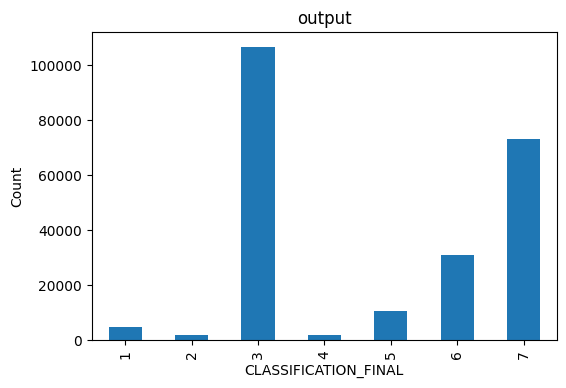

In [24]:
plt.figure(figsize=(6, 4))
data_MC['CLASSIFICATION_FINAL'].value_counts().sort_index().plot(kind='bar')

plt.title('output')
plt.xlabel('CLASSIFICATION_FINAL')
plt.ylabel('Count')
plt.show()

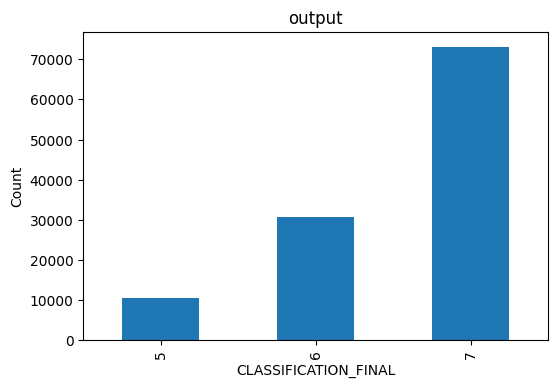

In [26]:
data_MC = data_MC[data_MC['CLASSIFICATION_FINAL'].isin([5, 6, 7])]
plt.figure(figsize=(6, 4))
data_MC['CLASSIFICATION_FINAL'].value_counts().sort_index().plot(kind='bar')

plt.title('output')
plt.xlabel('CLASSIFICATION_FINAL')
plt.ylabel('Count')
plt.show()

#### Downsampling

In [27]:
min_size = data_MC['CLASSIFICATION_FINAL'].value_counts().min()
data_MC = data_MC.groupby('CLASSIFICATION_FINAL', group_keys=False).apply(lambda x: x.sample(n=min_size, random_state=42))


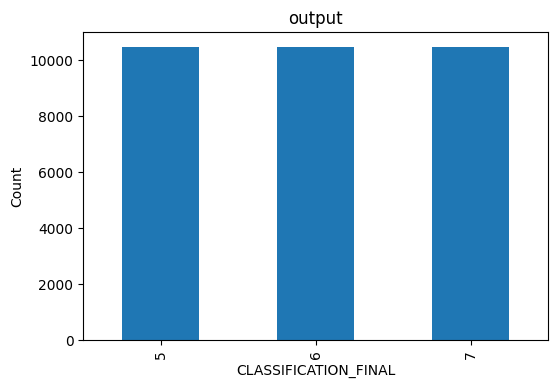

In [28]:
plt.figure(figsize=(6, 4))
data_MC['CLASSIFICATION_FINAL'].value_counts().sort_index().plot(kind='bar')

plt.title('output')
plt.xlabel('CLASSIFICATION_FINAL')
plt.ylabel('Count')
plt.show()

In [29]:
X = data_MC.drop(columns=['CLASSIFICATION_FINAL'])
y = data_MC['CLASSIFICATION_FINAL']


In [30]:
val_size = 0.15
test_size = 0.15

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=test_size, stratify=y, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=val_size / (1 - test_size),
    stratify=y_temp, random_state=42
)

In [31]:
binary_cols = ['PNEUMONIA', 'DIABETES', 'INMSUPR', 'OTHER_DISEASE', 'TOBACCO', 'RENAL_CHRONIC', 'OBESITY', 'CARDIOVASCULAR', 'HIPERTENSION', 'ASTHMA', 'COPD']
data_MC[binary_cols] = data_MC[binary_cols].replace({2: 0})
X_test[binary_cols] = data_MC[binary_cols].replace({2: 0})
X_val[binary_cols] = data_MC[binary_cols].replace({2: 0})
X_train[binary_cols] = data_MC[binary_cols].replace({2: 0})

In [32]:
categorical_cols = ['SEX', 'PATIENT_TYPE', 'MEDICAL_UNIT']
data_MC = pd.get_dummies(data_MC, columns=categorical_cols, drop_first=True, dtype=int)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True, dtype=int)
X_val = pd.get_dummies(X_val, columns=categorical_cols, drop_first=True, dtype=int)
X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True, dtype=int)



In [33]:
data_MC = data_MC.rename(columns={
    'SEX_2': 'IS_MALE',
    'PATIENT_TYPE_2': 'IS_HOSPITALIZED'
})
X_test = X_test.rename(columns={
    'SEX_2': 'IS_MALE',
    'PATIENT_TYPE_2': 'IS_HOSPITALIZED'
})
X_val = X_val.rename(columns={
    'SEX_2': 'IS_MALE',
    'PATIENT_TYPE_2': 'IS_HOSPITALIZED'
})
X_train = X_train.rename(columns={
    'SEX_2': 'IS_MALE',
    'PATIENT_TYPE_2': 'IS_HOSPITALIZED'
})

In [34]:
scaler = MinMaxScaler()
data_MC['AGE'] = scaler.fit_transform(data_MC[['AGE']])
X_test['AGE'] = scaler.fit_transform(X_test[['AGE']])
X_val['AGE'] = scaler.fit_transform(X_val[['AGE']])
X_train['AGE'] = scaler.fit_transform(X_train[['AGE']])


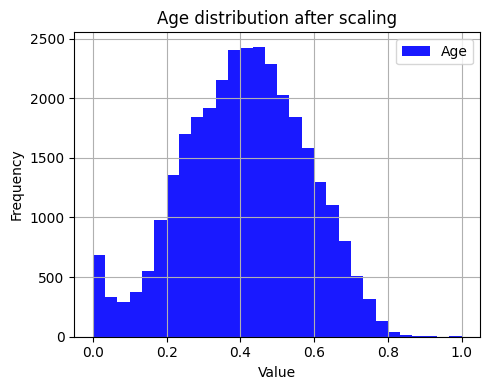

In [35]:
plt.figure(figsize=(5, 4)) 
plt.hist(data_MC['AGE'], bins=30, alpha=0.9, color='blue')
plt.title("Age distribution after scaling")  
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend(["Age"])
plt.grid()
plt.tight_layout()
plt.show()